In [4]:
import osmnx as ox
import matplotlib as plt

C:\Users\busra\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\busra\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\busra\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\busra\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [5]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
place_name = "London" #London

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

In [6]:
type(graph) 

networkx.classes.multidigraph.MultiDiGraph

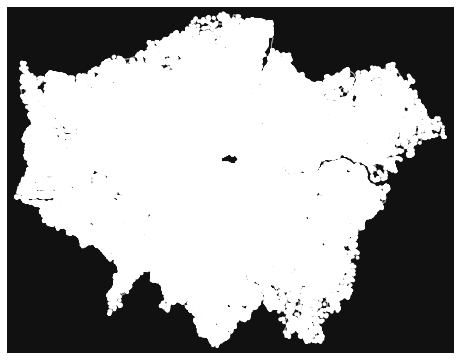

In [29]:
fig, ax = ox.plot_graph(graph)

In [7]:
area = ox.geocode_to_gdf(place_name) # returns a GeoDataFrame based on the specified place name query

In [8]:
type(area)

geopandas.geodataframe.GeoDataFrame

In [9]:
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-0.51038 51.46809, -0.51036 51.46795...",51.691874,51.28676,0.334016,-0.510375,337431668,relation,65606,51.507322,-0.127647,"London, Greater London, England, United Kingdom",place,city,0.940783


<AxesSubplot:>

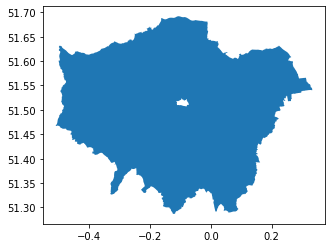

In [10]:
area.plot()

1-PUB

In [11]:
# Retrieve restaurants
pub = ox.geometries_from_place(place_name, tags={"amenity": "pub"})

C:\Users\busra\anaconda3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\busra\anaconda3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [12]:
len(pub)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3153

In [13]:
# Available columns
pub.columns

Index(['addr:city', 'addr:housename', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'amenity', 'cuisine', 'diet:gluten_free', 'diet:meat',
       'diet:vegan',
       ...
       'happycow:id', 'outdoor_seating:comfort', 'not:fhrs:id',
       'internet_access:ssid', 'access:conditional', 'note:access',
       'heritage:name', 'internet_access:access', 'internet_access:wlan:key',
       'ways'],
      dtype='object', length=299)

In [14]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
x=pub[cols]

In [15]:
x.to_csv('xpub.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
x

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                            
node         451152           King of Prussia        N3 1DH   
             451154    The Catcher in the Rye           NaN   
             451271              The Tally Ho           NaN   
             12242503            Railway Bell           NaN   
             12243302              The George       E11 2RL   
...                                       ...           ...   
relation     12463327          The Kings Arms       UB9 6BJ   
             12704739       Crown and Sceptre       W12 9HY   
             12811040       Princess Victoria       W12 9DH   
             12967587               The Raven           NaN   
             13077421    The Stonemasons Arms           NaN   

                                                                geometry  \
element_type osmid                                                         
node         451152                            POINT (-0.19461 51.60084)   
             451154                            POINT (-0.19603 51.59958)   
             451271                            POINT (-0.17656 51.61410)   
             12242503                           POINT (0.02796 51.59202)   
             12243302                           POINT (0.02822 51.57599)   
...                                                                  ...   
relation     12463327  POLYGON ((-0.48215 51.60473, -0.48211 51.60483...   
             12704739  MULTIPOLYGON (((-0.23661 51.50339, -0.23655 51...   
             12811040  POLYGON ((-0.24112 51.50639, -0.24111 51.50645...   
             12967587  POLYGON ((-0.24462 51.49517, -0.24448 51.49516...   
             13077421  MULTIPOLYGON (((-0.23025 51.49434, -0.23027 51...   

                      amenity        addr:street addr:city  
element_type osmid                                          
node         451152       pub  Regents Park Road    London  
             451154       pub  Regents Park Road       NaN  
             451271       pub          High Road    London  
             12242503     pub                NaN       NaN  
             12243302     pub        High Street    London  
...                       ...                ...       ...  
relation     12463327     pub          Park Lane       NaN  
             12704739     pub        Melina Road    London  
             12811040     pub      Uxbridge Road    London  
             12967587     pub      Goldhawk Road       NaN  
             13077421     pub    Cambridge Grove       NaN  

[3153 rows x 6 columns]

2-RESTAURANT

In [17]:
# Retrieve restaurants
restaurants = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "restaurant"}
                                 )

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# How many restaurants do we have?
len(restaurants)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7467

In [19]:
# Available columns
restaurants.columns

Index(['amenity', 'name', 'geometry', 'addr:city', 'addr:housename',
       'addr:housenumber', 'addr:postcode', 'addr:street', 'cuisine',
       'fhrs:authority',
       ...
       'note:name:en', 'note:name:zh', 'website:en', 'serving_system:buffet',
       'fixme:addr4', 'website:booking', 'nohousenumber', 'ref:GB:uprn',
       'diet:local', 'ways'],
      dtype='object', length=356)

In [20]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
x1=restaurants[cols]

In [21]:
x1

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                     
node         451153                 Central Restaurant           NaN   
             26544484                   Casuarina Tree       CR4 4BG   
             26604024                           Jin Li       UB8 3NJ   
             26845558              Old Tree Daiwan Bee           NaN   
             31098623                      The Unicorn       RM2 5EL   
...                                                ...           ...   
way          1079828379                     Olive Tree       BR6 0NW   
relation     3981083         The Crystal Palace Market      SE19 2TF   
             12479268    Harefield Hospital Restaurant           NaN   
             13028898                        Melanzana      SW11 3PF   
             14209999                             Aqua       SE3 0TA   

                                                                  geometry  \
element_type osmid                                                           
node         451153                              POINT (-0.19350 51.60203)   
             26544484                            POINT (-0.17223 51.39801)   
             26604024                            POINT (-0.45855 51.52573)   
             26845558                            POINT (-0.13256 51.51105)   
             31098623                             POINT (0.20053 51.58686)   
...                                                                    ...   
way          1079828379  POLYGON ((0.09875 51.37470, 0.09871 51.37466, ...   
relation     3981083     POLYGON ((-0.07845 51.41967, -0.07831 51.41959...   
             12479268    POLYGON ((-0.48294 51.60743, -0.48289 51.60744...   
             13028898    POLYGON ((-0.17504 51.47538, -0.17487 51.47542...   
             14209999    POLYGON ((0.00835 51.46663, 0.00829 51.46666, ...   

                            amenity       addr:street  addr:city  
element_type osmid                                                
node         451153      restaurant               NaN        NaN  
             26544484    restaurant       London Road    Mitcham  
             26604024    restaurant  Pield Heath Road   Uxbridge  
             26845558    restaurant               NaN        NaN  
             31098623    restaurant         Main Road    Romford  
...                             ...               ...        ...  
way          1079828379  restaurant       High Street  Orpington  
relation     3981083     restaurant       Church Road        NaN  
             12479268    restaurant               NaN        NaN  
             13028898    restaurant   Westbridge Road        NaN  
             14209999    restaurant   Montpelier Vale     London  

[7467 rows x 6 columns]

In [22]:
x1.to_csv('x1restaurants.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2-cafe

In [23]:
# Retrieve cafes
cafe = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "cafe"}
                                 )

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\busra\anaconda3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\busra\anaconda3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring 

In [24]:
# How many cafes do we have?
len(cafe)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5266

In [25]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
x2=cafe[cols]

In [26]:
x2

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                   
node         20849687                            NaN           NaN   
             25475389                    Woburn Cafe           NaN   
             25497832                     Cafe Angel           NaN   
             25991205                    Jack's Cafe        E8 2EZ   
             26269218          Springfield Park Cafe        E5 9EF   
...                                              ...           ...   
relation     7348318                      Caffè Nero           NaN   
             9607477   The Roasting Plant Coffeeshop       SE1 9QQ   
             11818937                  Baker & Spice           NaN   
             13013654  FusionFoods Pop-up Restaurant       E16 2JB   
             13244656                   Mae + Harvey           NaN   

                                                                geometry  \
element_type osmid                                                         
node         20849687                          POINT (-0.33402 51.41101)   
             25475389                          POINT (-0.12925 51.52658)   
             25497832                          POINT (-0.11611 51.52476)   
             25991205                          POINT (-0.07248 51.55090)   
             26269218                          POINT (-0.05709 51.56865)   
...                                                                  ...   
relation     7348318   POLYGON ((-0.07553 51.46019, -0.07555 51.46024...   
             9607477   POLYGON ((-0.08858 51.50639, -0.08855 51.50639...   
             11818937  POLYGON ((-0.16484 51.49397, -0.16487 51.49399...   
             13013654  POLYGON ((0.05983 51.50055, 0.05984 51.50058, ...   
             13244656  POLYGON ((-0.03521 51.53182, -0.03514 51.53183...   

                      amenity          addr:street addr:city  
element_type osmid                                            
node         20849687    cafe                  NaN       NaN  
             25475389    cafe                  NaN       NaN  
             25497832    cafe                  NaN       NaN  
             25991205    cafe     Shacklewell Lane    London  
             26269218    cafe          Springfield    London  
...                       ...                  ...       ...  
relation     7348318     cafe        Lordship Lane       NaN  
             9607477     cafe  Borough High Street       NaN  
             11818937    cafe        Denyer Street       NaN  
             13013654    cafe          Albert Road    London  
             13244656    cafe           Roman Road       NaN  

[5266 rows x 6 columns]

In [27]:
x2.to_csv('x2cafe.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3-TOWNHALL

In [28]:
# Retrieve cafes
townhall = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "townhall"}
                                 )

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\busra\anaconda3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\busra\anaconda3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring 

In [29]:
# How many cafes do we have?
len(townhall)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


48

In [30]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
x3=townhall[cols]

In [31]:
x3

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name  \
element_type osmid                                                           
node         33760184                                  Heston Village Hall   
             130240786                                 Merton Civic Centre   
             288044074                                                 NaN   
             401789696                                     Erith Town Hall   
             1320961198                                       Belmont Hall   
             5261637323                Greenwich Council (Woolwich Centre)   
             9007680303                         Hampstead Town Hall Centre   
way          2956187                                    Lewisham Town Hall   
             12164834                             Waltham Forest Town Hall   
             16409717                                Westminster City Hall   
             26748711                                     Ealing Town Hall   
             27822406                    Islington Town Hall/Assembly Hall   
             38762449                                Haringey Civic Centre   
             41981763                                 St Georges Town Hall   
             43001070    London Borough of Richmond upon Thames Civic C...   
             69955115                                      Parochial Rooms   
             78172958                                                  NaN   
             107005592                                    Camden Town Hall   
             118968996                                    Newham Town Hall   
             132390491                                  Havering Town Hall   
             159852280                                           City Hall   
             165902149                             Hillingdon Civic Centre   
             190800438                                      Mulberry Place   
             193418558                                     Jack Dash House   
             193799550                                   Croydon Town Hall   
             225931239                                  Brent Civic Centre   
             229395041                                 Tottenham Town Hall   
             238947899                                          York House   
             246629463                                  Woolwich Town Hall   
             276190071                                      Centenary Hall   
             292657586                                   Lambeth Town Hall   
             302958247                                 Redbridge Town Hall   
             304295282                                 Keston Village Hall   
             332400834                                Bexley Civic Offices   
             496919071                              Highlands Village Hall   
             684023441                                      Hounslow House   
             795839332                                                 NaN   
             795851265                                    TABS Centre Plus   
             858087924                                  Hayes Village Hall   
             961975159                                   Bromley Town Hall   
             966045324                               St Mary's Church Hall   
relation     906541                              Stoke Newington Town Hall   
             1153187                                  Kensington Town Hall   
             1720432                                    Kingston Town Hall   
             2740901                                  Wandsworth Town Hall   
             3641032                                     Hackney Town Hall   
             6543238                                 Hammersmith Town Hall   
             9627041               Westminster City Council - Lisson Grove   

                           addr:postcode  \
element_type osmid                         
node         33760184                NaN   
             130240786           SM4 

In [32]:
x3.to_csv('x3townhall.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4-post_office

In [33]:
# Retrieve cafes
post_office = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "post_office"}
                                 )

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# How many cafes do we have?
len(post_office)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


607

In [35]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
x4=post_office[cols]

In [36]:
x4.to_csv('x4.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
x4

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name  \
element_type osmid                                                      
node         13833379                       Torridon Road Post Office   
             21776749                        Sudbury Hill Post Office   
             27125187                          Hackbridge Post Office   
             27204205                                         WHSmith   
             30484259                       Kingston Vale Post Office   
...                                                               ...   
way          1039102732                      Hounslow Delivery Office   
             1058412608                      St Margarets Post Office   
             1059420276                               Sonya Newsagent   
             1061435242  Hampton Wick Post Office & Convenience Store   
relation     7599030                                  Mail Boxes Etc.   

                        addr:postcode  \
element_type osmid                      
node         13833379         SE6 1RF   
             21776749             NaN   
             27125187         SM6 7HF   
             27204205             NaN   
             30484259        SW15 3PS   
...                               ...   
way          1039102732       TW3 1AA   
             1058412608       TW1 2AA   
             1059420276       TW9 3QD   
             1061435242       KT1 4DB   
relation     7599030              NaN   

                                                                  geometry  \
element_type osmid                                                           
node         13833379                            POINT (-0.00166 51.43978)   
             21776749                            POINT (-0.33564 51.55785)   
             27125187                            POINT (-0.15567 51.37972)   
             27204205                            POINT (-0.18258 51.58568)   
             30484259                            POINT (-0.25780 51.43504)   
...                                                                    ...   
way          1039102732  POLYGON ((-0.36117 51.46984, -0.36118 51.46984...   
             1058412608  POLYGON ((-0.31956 51.45525, -0.31950 51.45522...   
             1059420276  POLYGON ((-0.28638 51.47801, -0.28633 51.47797...   
             1061435242  POLYGON ((-0.31135 51.41325, -0.31121 51.41330...   
relation     7599030     POLYGON ((-0.13473 51.49748, -0.13476 51.49747...   

                             amenity        addr:street     addr:city  
element_type osmid                                                     
node         13833379    post_office                NaN           NaN  
             21776749    post_office                NaN           NaN  
             27125187    post_office        London Road    Wallington  
             27204205    post_office                NaN           NaN  
             30484259    post_office        Vale Parade        London  
...                              ...                ...           ...  
way          1039102732  post_office       Matisse Road      Hounslow  
             1058412608  post_office  St Margarets Road    Twickenham  
             1059420276  post_office       Royal Parade      Richmond  
             1061435242  post_office        High Street  Hampton Wick  
relation     7599030     post_office                NaN           NaN  

[607 rows x 6 columns]

5-MARKETPLACE

In [38]:
# Retrieve cafes
marketplace = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "marketplace"}
                                 )

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\busra\anaconda3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\busra\anaconda3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring 

In [39]:
# How many cafes do we have?
len(marketplace)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


138

In [40]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
x5=marketplace[cols]

In [41]:
x5.to_csv('x5.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
x5

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                    
node         331101736               Nags Head Market        N7 6AG   
             336353308                 The Great Barn           NaN   
             353316707                Woolwich Market           NaN   
             353316849        Woolwich Covered Market           NaN   
             792683624   Queen's Park Farmers' Market           NaN   
...                                               ...           ...   
way          949859231              Roman Road Market           NaN   
             973163217   The Greenwich Vintage Market      SE10 9BQ   
             987076101                      Ryan Gate       KT4 8HQ   
             1073640065           Kelland Road Market           NaN   
relation     11370057              Walthamstow Market           NaN   

                                                                  geometry  \
element_type osmid                                                           
node         331101736                           POINT (-0.11811 51.55818)   
             336353308                           POINT (-0.42867 51.57815)   
             353316707                            POINT (0.06932 51.49114)   
             353316849                            POINT (0.07061 51.49089)   
             792683624                           POINT (-0.20583 51.53671)   
...                                                                    ...   
way          949859231   LINESTRING (-0.02680 51.53411, -0.02758 51.533...   
             973163217   POLYGON ((-0.00904 51.48027, -0.00907 51.48040...   
             987076101   POLYGON ((-0.24372 51.37980, -0.24376 51.37985...   
             1073640065  POLYGON ((0.02198 51.52251, 0.02192 51.52248, ...   
relation     11370057    MULTIPOLYGON (((-0.02805 51.58284, -0.02978 51...   

                             amenity              addr:street       addr:city  
element_type osmid                                                             
node         331101736   marketplace       Seven Sisters Road          London  
             336353308   marketplace                      NaN             NaN  
             353316707   marketplace                      NaN             NaN  
             353316849   marketplace                      NaN             NaN  
             792683624   marketplace                      NaN             NaN  
...                              ...                      ...             ...  
way          949859231   marketplace                      NaN             NaN  
             973163217   marketplace  Greenwich Church Street          London  
             987076101   marketplace             Central Road  Worcester Park  
             1073640065  marketplace                      NaN             NaN  
relation     11370057    marketplace                      NaN             NaN  

[138 rows x 6 columns]

6-	nightclub

In [43]:
# Retrieve cafes
nightclub = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "nightclub"}
                                 )

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
# How many cafes do we have?
len(nightclub)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


144

In [45]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
x6=nightclub[cols]

In [46]:
x6.to_csv('x6.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
x6

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                         
node         264624316       Club Aquarium           NaN   
             291951100     Parker McMillan      EC1Y 4SB   
             296889738          Bar Monsta           NaN   
             313349354            100 Club       W1D 1LL   
             331880875         Lucky Voice           NaN   
...                                    ...           ...   
way          701595246           The Venue           NaN   
             906775252     Raffles Chelsea           NaN   
             966309614    Pure Lounge Club           NaN   
             971050396   The Secret Lounge           NaN   
             1001831573            Shelter           NaN   

                                                                  geometry  \
element_type osmid                                                           
node         264624316                           POINT (-0.08545 51.52602)   
             291951100                           POINT (-0.09169 51.52108)   
             296889738                           POINT (-0.14210 51.54005)   
             313349354                           POINT (-0.13536 51.51611)   
             331880875                           POINT (-0.10308 51.54144)   
...                                                                    ...   
way          701595246   POLYGON ((-0.47443 51.53351, -0.47405 51.53351...   
             906775252   POLYGON ((-0.17380 51.48538, -0.17385 51.48536...   
             966309614   POLYGON ((0.13825 51.45719, 0.13827 51.45719, ...   
             971050396   POLYGON ((-0.23119 51.49454, -0.23137 51.49454...   
             1001831573  POLYGON ((-0.07704 51.53563, -0.07704 51.53569...   

                           amenity      addr:street addr:city  
element_type osmid                                             
node         264624316   nightclub              NaN       NaN  
             291951100   nightclub  Chiswell Street    London  
             296889738   nightclub              NaN       NaN  
             313349354   nightclub    Oxford Street    London  
             331880875   nightclub              NaN       NaN  
...                            ...              ...       ...  
way          701595246   nightclub              NaN       NaN  
             906775252   nightclub      King's Road       NaN  
             966309614   nightclub              NaN       NaN  
             971050396   nightclub  Glenthorne Road       NaN  
             1001831573  nightclub              NaN       NaN  

[144 rows x 6 columns]

7-Cinema

In [49]:
# Retrieve cinema
cinema = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "cinema"}
                                 )

In [50]:
len(cinema)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


129

In [51]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
x7=cinema[cols]

In [52]:
x7.to_csv('x7.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
x7

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                  
node         26573161               Odeon Mezzanine           NaN   
             26573168    Cineworld Leicester Square           NaN   
             26573173          Vue Leicester Square           NaN   
             26671967           Odeon Panton Street           NaN   
             26699541                   Curzon Soho           NaN   
...                                             ...           ...   
way          597454248            Rooftop Film Club      SE15 4ST   
             708645222                    Cineworld           NaN   
             813989760              Backyard Cinema      SW18 1ET   
             821235793                          VUE           NaN   
             1039099015                   Cineworld       TW3 1EL   

                                                                  geometry  \
element_type osmid                                                           
node         26573161                            POINT (-0.12908 51.51021)   
             26573168                            POINT (-0.13041 51.51093)   
             26573173                            POINT (-0.12937 51.51124)   
             26671967                            POINT (-0.13122 51.50957)   
             26699541                            POINT (-0.13061 51.51266)   
...                                                                    ...   
way          597454248   POLYGON ((-0.06780 51.46993, -0.06779 51.46990...   
             708645222   POLYGON ((-0.40119 51.55858, -0.40107 51.55865...   
             813989760   POLYGON ((-0.19407 51.45826, -0.19407 51.45797...   
             821235793   POLYGON ((-0.22289 51.50754, -0.22280 51.50731...   
             1039099015  POLYGON ((-0.36196 51.46975, -0.36180 51.46937...   

                        amenity         addr:street addr:city  
element_type osmid                                             
node         26573161    cinema                 NaN       NaN  
             26573168    cinema    Leicester Square    London  
             26573173    cinema                 NaN       NaN  
             26671967    cinema                 NaN       NaN  
             26699541    cinema  Shaftesbury Avenue    London  
...                         ...                 ...       ...  
way          597454248   cinema            Rye Lane    London  
             708645222   cinema                 NaN       NaN  
             813989760   cinema    Wandsworth Plain    London  
             821235793   cinema                 NaN       NaN  
             1039099015  cinema         Smithy Lane  Hounslow  

[129 rows x 6 columns]

8-social_facility

In [54]:
# Retrieve social facilities
social_facility = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "social_facility"}
                                 )

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\busra\anaconda3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\busra\anaconda3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring 

In [55]:
len(social_facility)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


392

In [56]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
x8=social_facility[cols]

In [57]:
x8.to_csv('x8.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
x8

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                  
node         258016402                   Elder Care       SM5 3JG   
             289009575    St. Ann's Settlement Hall           NaN   
             339856840          Edith Pearson Lodge           NaN   
             677225989  Saint Gabriel's Social Club       HA2 8EX   
             684240216                  Glebe Court           NaN   
...                                             ...           ...   
relation     12921886              John Betts House           NaN   
             13132849             Northbourne Court           NaN   
             13152897                           NaN           NaN   
             13841578                           NaN           NaN   
             14228759       Machael Flanders Centre        W3 8PP   

                                                                 geometry  \
element_type osmid                                                          
node         258016402                          POINT (-0.16271 51.35487)   
             289009575                          POINT (-0.12042 51.48522)   
             339856840                          POINT (-0.01790 51.56304)   
             677225989                          POINT (-0.35828 51.56083)   
             684240216                          POINT (-0.01166 51.46811)   
...                                                                   ...   
relation     12921886   POLYGON ((-0.24338 51.49934, -0.24335 51.49927...   
             13132849   POLYGON ((0.09350 51.43497, 0.09368 51.43476, ...   
             13152897   POLYGON ((-0.14329 51.55619, -0.14318 51.55603...   
             13841578   POLYGON ((0.11246 51.49430, 0.11230 51.49425, ...   
             14228759   POLYGON ((-0.27076 51.50615, -0.27072 51.50608...   

                                amenity        addr:street   addr:city  
element_type osmid                                                      
node         258016402  social_facility  Stanley Park Road  Carshalton  
             289009575  social_facility                NaN         NaN  
             339856840  social_facility                NaN         NaN  
             677225989  social_facility      Northolt Road         NaN  
             684240216  social_facility                NaN         NaN  
...                                 ...                ...         ...  
relation     12921886   social_facility        Rylett Road         NaN  
             13132849   social_facility  Northbourne Court         NaN  
             13152897   social_facility                NaN         NaN  
             13841578   social_facility                NaN         NaN  
             14228759   social_facility        Church Road      London  

[392 rows x 6 columns]

10-Bank

In [69]:
# Retrieve banks
bank = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "bank"}
                                 )

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\busra\anaconda3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\busra\anaconda3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring 

In [70]:
len(bank)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


867

In [71]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
x10=bank[cols]

In [72]:
x10.to_csv('x10.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
x10

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                   
node         30585307       Barclays           NaN   
             30794429        HSBC UK           NaN   
             37552361      Santander           NaN   
             45265824        NatWest           NaN   
             60660465        HSBC UK           NaN   
...                              ...           ...   
way          1011224059  Lloyds Bank           NaN   
             1011224076     Barclays           NaN   
             1011408809      NatWest           NaN   
             1011408810   Metro Bank           NaN   
relation     12200227      Santander       SW3 4XB   

                                                                  geometry  \
element_type osmid                                                           
node         30585307                            POINT (-0.18776 51.51249)   
             30794429                            POINT (-0.06951 51.47211)   
             37552361                            POINT (-0.21625 51.35802)   
             45265824                             POINT (0.21964 51.60735)   
             60660465                            POINT (-0.12575 51.52299)   
...                                                                    ...   
way          1011224059  POLYGON ((-0.21623 51.46285, -0.21623 51.46285...   
             1011224076  POLYGON ((-0.21528 51.46444, -0.21566 51.46460...   
             1011408809  POLYGON ((-0.21570 51.46272, -0.21601 51.46279...   
             1011408810  POLYGON ((-0.21512 51.46337, -0.21538 51.46338...   
relation     12200227    POLYGON ((-0.16400 51.48954, -0.16401 51.48955...   

                        amenity         addr:street addr:city  
element_type osmid                                             
node         30585307      bank                 NaN       NaN  
             30794429      bank                 NaN       NaN  
             37552361      bank                 NaN       NaN  
             45265824      bank                 NaN       NaN  
             60660465      bank                 NaN       NaN  
...                         ...                 ...       ...  
way          1011224059    bank  Putney High Street    London  
             1011224076    bank  Putney High Street    London  
             1011408809    bank  Putney High Street    London  
             1011408810    bank  Putney High Street    London  
relation     12200227      bank         King's Road    London  

[867 rows x 6 columns]

11-Arts_Centre

In [74]:
# Retrieve arts centre
arts_centre = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "arts_centre"}
                                 )

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\busra\anaconda3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\busra\anaconda3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring 

In [75]:
len(arts_centre)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100

In [76]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
x11=arts_centre[cols]

In [77]:
x11.to_csv('x11.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
x11

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                          
node         248932663                         Manor Studio           NaN   
             257809707                                  NaN           NaN   
             354462293   East London Drama and Music Centre           NaN   
             357595334                            Syracusae           NaN   
             581961373                        Craft Central           NaN   
...                                                     ...           ...   
way          1053284595                        Tannery Arts           NaN   
             1068679022                       Jacksons Lane        N6 5AA   
relation     1698905                       Southbank Centre           NaN   
             2023676                       National Theatre           NaN   
             12111767                                   HQI       W12 7FQ   

                                                                  geometry  \
element_type osmid                                                           
node         248932663                           POINT (-0.13693 51.46653)   
             257809707                           POINT (-0.17641 51.61281)   
             354462293                           POINT (-0.00544 51.55272)   
             357595334                           POINT (-0.10657 51.53897)   
             581961373                           POINT (-0.10282 51.52241)   
...                                                                    ...   
way          1053284595  POLYGON ((-0.07794 51.49525, -0.07768 51.49517...   
             1068679022  POLYGON ((-0.14556 51.57653, -0.14545 51.57640...   
relation     1698905     MULTIPOLYGON (((-0.11571 51.50635, -0.11568 51...   
             2023676     POLYGON ((-0.11429 51.50635, -0.11474 51.50684...   
             12111767    POLYGON ((-0.22677 51.51455, -0.22669 51.51460...   

                             amenity   addr:street addr:city  
element_type osmid                                            
node         248932663   arts_centre           NaN       NaN  
             257809707   arts_centre           NaN       NaN  
             354462293   arts_centre           NaN       NaN  
             357595334   arts_centre           NaN       NaN  
             581961373   arts_centre           NaN       NaN  
...                              ...           ...       ...  
way          1053284595  arts_centre           NaN       NaN  
             1068679022  arts_centre  Archway Road       NaN  
relation     1698905     arts_centre           NaN       NaN  
             2023676     arts_centre           NaN       NaN  
             12111767    arts_centre     Wood Lane    London  

[100 rows x 6 columns]

In [79]:
x

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                            
node         451152           King of Prussia        N3 1DH   
             451154    The Catcher in the Rye           NaN   
             451271              The Tally Ho           NaN   
             12242503            Railway Bell           NaN   
             12243302              The George       E11 2RL   
...                                       ...           ...   
relation     12463327          The Kings Arms       UB9 6BJ   
             12704739       Crown and Sceptre       W12 9HY   
             12811040       Princess Victoria       W12 9DH   
             12967587               The Raven           NaN   
             13077421    The Stonemasons Arms           NaN   

                                                                geometry  \
element_type osmid                                                         
node         451152                            POINT (-0.19461 51.60084)   
             451154                            POINT (-0.19603 51.59958)   
             451271                            POINT (-0.17656 51.61410)   
             12242503                           POINT (0.02796 51.59202)   
             12243302                           POINT (0.02822 51.57599)   
...                                                                  ...   
relation     12463327  POLYGON ((-0.48215 51.60473, -0.48211 51.60483...   
             12704739  MULTIPOLYGON (((-0.23661 51.50339, -0.23655 51...   
             12811040  POLYGON ((-0.24112 51.50639, -0.24111 51.50645...   
             12967587  POLYGON ((-0.24462 51.49517, -0.24448 51.49516...   
             13077421  MULTIPOLYGON (((-0.23025 51.49434, -0.23027 51...   

                      amenity        addr:street addr:city  
element_type osmid                                          
node         451152       pub  Regents Park Road    London  
             451154       pub  Regents Park Road       NaN  
             451271       pub          High Road    London  
             12242503     pub                NaN       NaN  
             12243302     pub        High Street    London  
...                       ...                ...       ...  
relation     12463327     pub          Park Lane       NaN  
             12704739     pub        Melina Road    London  
             12811040     pub      Uxbridge Road    London  
             12967587     pub      Goldhawk Road       NaN  
             13077421     pub    Cambridge Grove       NaN  

[3153 rows x 6 columns]

In [80]:
newdf=x
newdf=newdf.append(x1)
newdf=newdf.append(x2)
newdf=newdf.append(x3)
newdf=newdf.append(x4)
newdf=newdf.append(x5)
newdf=newdf.append(x6)
newdf=newdf.append(x7)
newdf=newdf.append(x8)
newdf=newdf.append(x9)
newdf=newdf.append(x10)
newdf=newdf.append(x11)
newdf

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-80-8e68ad00efe6>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf=newdf.append(x1)
<ipython-input-80-8e68ad00efe6>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf=newdf.append(x2)
<ipython-input-80-8e68ad00efe6>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf=newdf.append(x3)
<ipython-input-80-8e68ad00efe6>:5: FutureWarning: The frame.app

name addr:postcode  \
element_type osmid                                              
node         451152             King of Prussia        N3 1DH   
             451154      The Catcher in the Rye           NaN   
             451271                The Tally Ho           NaN   
             12242503              Railway Bell           NaN   
             12243302                The George       E11 2RL   
...                                         ...           ...   
way          1053284595            Tannery Arts           NaN   
             1068679022           Jacksons Lane        N6 5AA   
relation     1698905           Southbank Centre           NaN   
             2023676           National Theatre           NaN   
             12111767                       HQI       W12 7FQ   

                                                                  geometry  \
element_type osmid                                                           
node         451152                              POINT (-0.19461 51.60084)   
             451154                              POINT (-0.19603 51.59958)   
             451271                              POINT (-0.17656 51.61410)   
             12242503                             POINT (0.02796 51.59202)   
             12243302                             POINT (0.02822 51.57599)   
...                                                                    ...   
way          1053284595  POLYGON ((-0.07794 51.49525, -0.07768 51.49517...   
             1068679022  POLYGON ((-0.14556 51.57653, -0.14545 51.57640...   
relation     1698905     MULTIPOLYGON (((-0.11571 51.50635, -0.11568 51...   
             2023676     POLYGON ((-0.11429 51.50635, -0.11474 51.50684...   
             12111767    POLYGON ((-0.22677 51.51455, -0.22669 51.51460...   

                             amenity        addr:street addr:city  
element_type osmid                                                 
node         451152              pub  Regents Park Road    London  
             451154              pub  Regents Park Road       NaN  
             451271              pub          High Road    London  
             12242503            pub                NaN       NaN  
             12243302            pub        High Street    London  
...                              ...                ...       ...  
way          1053284595  arts_centre                NaN       NaN  
             1068679022  arts_centre       Archway Road       NaN  
relation     1698905     arts_centre                NaN       NaN  
             2023676     arts_centre                NaN       NaN  
             12111767    arts_centre          Wood Lane    London  

[19125 rows x 6 columns]

In [81]:
newdf.to_csv('osmdata.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
newdf.head(50)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                
node         451152               King of Prussia        N3 1DH   
             451154        The Catcher in the Rye           NaN   
             451271                  The Tally Ho           NaN   
             12242503                Railway Bell           NaN   
             12243302                  The George       E11 2RL   
             15262028           The Monkey Puzzle        W2 1JQ   
             18235090                The Arab Boy      SW15 6SP   
             20821133               The Union Bar           NaN   
             20973312                  Kings Arms       SW6 4RN   
             20973316               The Waterside           NaN   
             21593232         The Knights Templar      WC2A 1DT   
             21593236                 Ship Tavern      WC2A 3HP   
             25471087        Marquess of Anglesey           NaN   
             25475914                    The Swan           NaN   
             25501630                   McGlynn's      WC1H 8ET   
             25510381             Crown & Cushion       SE1 7HR   
             25523569           Shortlands Tavern       BR2 0EY   
             25524219                 The Railway           NaN   
             25534171          The Lillie Langtry       NW6 4SL   
             25592547            The Duke of York        W7 3SP   
             25597580               The Islington           NaN   
             25597628                 The Angelic        N1 0RJ   
             25717653        The Old Ale Emporium           NaN   
             25717655            The Beaconsfield           NaN   
             25729218           The Brockley Jack       SE4 2DH   
             25744507             Aces and Eights       NW5 2HP   
             25746185         The Cheshire Cheese      WC2R 3LD   
             26065903              The BlackStock        N4 2HY   
             26197017  The White Lion of Mortimer           NaN   
             26310696            Fox on the Green        N1 2XH   
             26363049                    The Gate           NaN   
             26545063                The Windmill           NaN   
             26545687             The Queens Head       CR4 4LA   
             26603473             The Load of Hay       UB8 2PU   
             26603928                  The Runway           NaN   
             26603929                   The Crown       UB8 2NL   
             26610587              The Good Mixer           NaN   
             26610590             The Oxford Arms       NW1 7BU   
             26699558            The Flying Horse           NaN   
             26979398                Queen's Head       UB8 1AB   
             26979399            The Metropolitan       UB8 1AB   
             26979400                The Fig Tree       UB8 1AB   
             26979401                     Whelans           NaN   
             26979403              The Three Tuns           NaN   
             26980235                  The Wonder           NaN   
             26982478               The Pied Bull       EN2 9HE   
             26982535         The King and Tinker           NaN   
             26992533              General Napier           NaN   
             26992933               The Honor Oak      SE23 1RH   
             27012806         The Hope and Anchor        N1 1RL   

                                        geometry amenity  \
element_type osmid                                         
node         451152    POINT (-0.19461 51.60084)     pub   
             451154    POINT (-0.19603 51.59958)     pub   
             451271    POINT (-0.17656 51.61410)     pub   
             12242503   POINT (0.02796 51.59202)     pub   
             12243302   POINT (0.02822 51.57599)     pub   
             15262028  POINT (-0.16983 51.51648)     pub   
             18235090  POINT (-0.22670 51.46286)     pub   
             2082113

EDINBURGH

In [90]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
place_name = "City of Edinburgh" #Edinburgh

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
type(graph) 

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


networkx.classes.multidigraph.MultiDiGraph

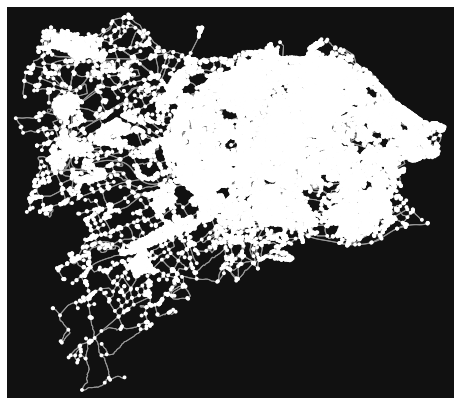

In [92]:
fig, ax = ox.plot_graph(graph)

In [93]:
area = ox.geocode_to_gdf(place_name) # returns a GeoDataFrame based on the specified place name query

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
type(area)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


geopandas.geodataframe.GeoDataFrame

In [95]:
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-3.44953 55.95094, -3.44811 55.94970...",56.004084,55.818792,-3.074951,-3.449533,284776755,relation,1920901,55.911743,-3.277097,"City of Edinburgh, Scotland, United Kingdom",boundary,administrative,0.976704


C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

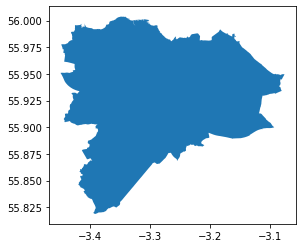

In [96]:
area.plot()

1-PUBS

In [97]:
pub = ox.geometries_from_place(place_name, tags={"amenity": "pub"})

len(pub)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


343

In [98]:
# Available columns
pub.columns

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['amenity', 'name', 'geometry', 'addr:city', 'addr:housenumber',
       'addr:street', 'phone', 'real_ale', 'source', 'website', 'wheelchair',
       'addr:country', 'addr:postcode', 'opening_hours', 'outdoor_seating',
       'start_date', 'wikidata', 'wikimedia_commons', 'wikipedia', 'brewery',
       'indoor_seating', 'description', 'food', 'operator', 'fhrs:id',
       'source:addr', 'facebook', 'toilets', 'toilets:wheelchair',
       'beer_garden', 'twitter', 'tourism', 'cuisine', 'old_name',
       'diet:vegan', 'alt_name', 'internet_access', 'real_fire', 'sky',
       'floor:material', 'camra', 'lgbtq', 'takeaway', 'addr:unit',
       'microbrewery', 'addr:housename', 'access', 'note', 'toilets:access',
       'toilets:disposal', 'toilets:female', 'toilets:hand_drying',
       'toilets:handwashing', 'toilets:male', 'toilets:position',
       'postal_code', 'wheelchair:description', 'internet_access:fee', 'level',
       'smoking', 'brand', 'brand:wikidata', 'brand:wikipedia

In [99]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']

In [100]:
# Print only selected cols
y1=pub[cols]

In [101]:
y1

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                           
node         25346760                Swany's           NaN   
             25346762           Old Bell Inn           NaN   
             25580807        Old Eastway Tap       EH7 5QH   
             30452540         Sheep Heid Inn      EH15 3QA   
             33179113   BrewDog Lothian Road       EH3 9BY   
...                                      ...           ...   
way          351137530         Mid Yoken Pub           NaN   
             351447760      The Starbank Inn           NaN   
             377738789        Booking Office       EH1 1BQ   
             404743182        Hunter's Tryst      EH13 9NG   
             428078947         Newbridge Inn      EH28 8SR   

                                                                 geometry  \
element_type osmid                                                          
node         25346760                           POINT (-3.17893 55.93480)   
             25346762                           POINT (-3.17906 55.93493)   
             25580807                           POINT (-3.17076 55.96229)   
             30452540                           POINT (-3.14854 55.94198)   
             33179113                           POINT (-3.20658 55.94750)   
...                                                                   ...   
way          351137530  POLYGON ((-3.30333 55.95214, -3.30327 55.95204...   
             351447760  POLYGON ((-3.20215 55.97984, -3.20216 55.97986...   
             377738789  POLYGON ((-3.19149 55.95164, -3.19158 55.95182...   
             404743182  POLYGON ((-3.22058 55.90211, -3.22053 55.90216...   
             428078947  POLYGON ((-3.40824 55.93929, -3.40814 55.93932...   

                       amenity      addr:street  addr:city  
element_type osmid                                          
node         25346760      pub              NaN        NaN  
             25346762      pub     Causewayside  Edinburgh  
             25580807      pub      Easter Road        NaN  
             30452540      pub     The Causeway  Edinburgh  
             33179113      pub     Lothian Road  Edinburgh  
...                        ...              ...        ...  
way          351137530     pub              NaN        NaN  
             351447760     pub              NaN        NaN  
             377738789     pub  Waverley Bridge  Edinburgh  
             404743182     pub     Oxgangs Road  Edinburgh  
             428078947     pub    Bridge Street  Edinburgh  

[343 rows x 6 columns]

In [121]:
y1.to_csv('y1pub.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2-RESTAURANTS

In [104]:
# Retrieve restaurants
restaurants = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "restaurant"}
                                 )

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
# How many restaurants do we have?
len(restaurants)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


618

In [106]:
# Available columns
restaurants.columns

Index(['addr:city', 'addr:housenumber', 'addr:postcode', 'addr:street',
       'amenity', 'cuisine', 'name', 'phone', 'source', 'wheelchair',
       ...
       'contact:email', 'contact:tripadvisor', 'nodes', 'building',
       'building:levels', 'building:material', 'architect', 'roof:shape',
       'roof:levels', 'building:min_level'],
      dtype='object', length=122)

In [111]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
# Print only selected cols
y2=restaurants[cols]

In [113]:
y2.to_csv('y2restaurants.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
y2

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                        
node         21042679                       Happy Hot Pot       EH8 9NZ   
             29173148                     Miller & Carter       EH4 6DY   
             44551391                           Ciao Roma       EH1 1LS   
             50503871                         Urban Angel           NaN   
             50503874                         La Garrigue           NaN   
...                                                   ...           ...   
way          283924455                       Toby Carvery      EH16 6PG   
             299906559               Spice Lounge Kitchen      EH12 8HG   
             330640936                     Stables Bistro           NaN   
             449206439                 Ratho Park Carvery      EH27 8EG   
             636957454  The Lookout by Gardener’s Cottage           NaN   

                                                                 geometry  \
element_type osmid                                                          
node         21042679                           POINT (-3.18044 55.94062)   
             29173148                           POINT (-3.31735 55.96526)   
             44551391                           POINT (-3.18597 55.94745)   
             50503871                           POINT (-3.19761 55.95478)   
             50503874                           POINT (-3.18509 55.95121)   
...                                                                   ...   
way          283924455  POLYGON ((-3.16497 55.90328, -3.16490 55.90319...   
             299906559  POLYGON ((-3.29497 55.94731, -3.29506 55.94768...   
             330640936  POLYGON ((-3.39351 55.95212, -3.39362 55.95209...   
             449206439  POLYGON ((-3.36838 55.90923, -3.36826 55.90906...   
             636957454  POLYGON ((-3.18398 55.95516, -3.18397 55.95521...   

                           amenity         addr:street  addr:city  
element_type osmid                                                 
node         21042679   restaurant  South Clerk Street  Edinburgh  
             29173148   restaurant    Queensferry Road  Edinburgh  
             44551391   restaurant        South Bridge  Edinburgh  
             50503871   restaurant      Hanover Street  Edinburgh  
             50503874   restaurant      Jeffrey Street  Edinburgh  
...                            ...                 ...        ...  
way          283924455  restaurant    Howden Hall Road  Edinburgh  
             299906559  restaurant     Craigmount View  Edinburgh  
             330640936  restaurant                 NaN        NaN  
             449206439  restaurant       Dalmahoy Road   Dalmahoy  
             636957454  restaurant                 NaN        NaN  

[618 rows x 6 columns]

In [ ]:
3-CAFES

In [116]:
# Retrieve cafes
cafe = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "cafe"}
                                 )


C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
# How many cafes do we have?
len(cafe)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


651

In [118]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']

In [119]:
# Print only selected cols
y3=cafe[cols]

y3

name addr:postcode  \
element_type osmid                                            
node         33579195    Boardwalk Beach Club       EH4 5ES   
             183297603                  Costa           NaN   
             247056173       The Terrace Cafe      EH11 1RY   
             276406765            Victor Hugo           NaN   
             313150434      The Richmond Cafe           NaN   
...                                       ...           ...   
way          648755287                    NaN           NaN   
             694763673              Starbucks           NaN   
             720325571                  Costa           NaN   
             948857072                  Costa           NaN   
             1083846163    Outboard by Scotts      EH30 9SQ   

                                                                  geometry  \
element_type osmid                                                           
node         33579195                            POINT (-3.27913 55.97946)   
             183297603                           POINT (-3.28216 55.94263)   
             247056173                           POINT (-3.22962 55.93342)   
             276406765                           POINT (-3.18722 55.93937)   
             313150434                           POINT (-3.12898 55.93312)   
...                                                                    ...   
way          648755287   POLYGON ((-3.18312 55.95505, -3.18313 55.95500...   
             694763673   POLYGON ((-3.10187 55.93416, -3.10182 55.93415...   
             720325571   POLYGON ((-3.10157 55.94071, -3.10153 55.94061...   
             948857072   POLYGON ((-3.30774 55.92634, -3.30767 55.92617...   
             1083846163  POLYGON ((-3.40694 55.99342, -3.40695 55.99339...   

                        amenity       addr:street          addr:city  
element_type osmid                                                    
node         33579195      cafe      Marine Drive          Edinburgh  
             183297603     cafe    St John's Road          Edinburgh  
             247056173     cafe    Ashley Terrace          Edinburgh  
             276406765     cafe  Melville Terrace          Edinburgh  
             313150434     cafe               NaN                NaN  
...                         ...               ...                ...  
way          648755287     cafe               NaN                NaN  
             694763673     cafe               NaN                NaN  
             720325571     cafe               NaN                NaN  
             948857072     cafe               NaN                NaN  
             1083846163    cafe               NaN  South Queensferry  

[651 rows x 6 columns]

In [122]:
y3.to_csv('y3cafe.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4-TOWNHALL

In [133]:
# Retrieve townhall
townhall = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "townhall"}
                                 )


C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
len(townhall)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3

In [136]:
townhall

source  \
element_type osmid                                        
way          32350900   NLS_OS_Edinburgh_map_1940s;Bing   
             559120587                              NaN   
relation     1013995                                NaN   

                                                                 geometry  \
element_type osmid                                                          
way          32350900   POLYGON ((-3.11524 55.95316, -3.11519 55.95313...   
             559120587  POLYGON ((-3.39693 55.98988, -3.39691 55.98993...   
relation     1013995    POLYGON ((-3.19079 55.95014, -3.19081 55.95019...   

                                                                    nodes  \
element_type osmid                                                          
way          32350900   [364154228, 3717161103, 3717161102, 3717161098...   
             559120587  [2661485518, 2661485555, 2661485559, 266148561...   
relation     1013995    [[[835545877, 3090891752, 3090891755, 30905923...   

                         amenity building heritage                     name  \
element_type osmid                                                            
way          32350900   townhall      yes      yes     Portobello Town Hall   
             559120587  townhall      yes      NaN                      NaN   
relation     1013995    townhall   public      NaN  Edinburgh City Chambers   

                         wikidata                  ways building:levels  \
element_type osmid                                                        
way          32350900   Q17810616                   NaN             NaN   
             559120587        NaN                   NaN             NaN   
relation     1013995     Q5338167  [26564164, 63997807]               4   

                            name:ko roof:levels          type  
element_type osmid                                             
way          32350900           NaN         NaN           NaN  
             559120587          NaN         NaN           NaN  
relation     1013995    에든버러 시티 챔버스           0  multipolygon

In [129]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
y4

In [ ]:
y4.to_csv('y4townhall.csv')

5-POSTOFFICE

In [137]:
# Retrieve POSTOFFİCES
post_office = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "post_office"}
                                 )

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [138]:
len(post_office)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


61

In [139]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']

In [140]:
# Print only selected cols
y5=post_office[cols]

In [141]:
y5.to_csv('y5post_office.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [142]:
y5

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                         
node         21042678              Grange Road Post Office       EH9 1SL   
             27719379                                  NaN           NaN   
             33846575         Davidson's Mains Post Office       EH4 5AT   
             60137489          St Marys Street Post Office       EH1 1SX   
             64479449               Dalry Road Post Office      EH11 2AB   
...                                                    ...           ...   
             5535891672  Great Junction Street Post Office       EH6 5HX   
             6475735929          Newhaven Road Post Office       EH6 4QE   
             8023224201             Moat Place Post Office           NaN   
             8026203658             Collintons Post Office      EH13 9BJ   
way          248000516        Blackford Avenue Post Office       EH9 2PP   

                                                                  geometry  \
element_type osmid                                                           
node         21042678                            POINT (-3.17875 55.93704)   
             27719379                            POINT (-3.10400 55.93856)   
             33846575                            POINT (-3.26952 55.96507)   
             60137489                            POINT (-3.18334 55.94971)   
             64479449                            POINT (-3.21916 55.94358)   
...                                                                    ...   
             5535891672                          POINT (-3.17250 55.97070)   
             6475735929                          POINT (-3.19326 55.97839)   
             8023224201                          POINT (-3.23783 55.93144)   
             8026203658                          POINT (-3.23285 55.90938)   
way          248000516   POLYGON ((-3.18732 55.92748, -3.18719 55.92752...   

                             amenity            addr:street  addr:city  
element_type osmid                                                      
node         21042678    post_office        Salisbury Place  Edinburgh  
             27719379    post_office                    NaN        NaN  
             33846575    post_office                    NaN  Edinburgh  
             60137489    post_office       St Mary's Street  Edinburgh  
             64479449    post_office             Dalry Road  Edinburgh  
...                              ...                    ...        ...  
             5535891672  post_office  Great Junction Street  Edinburgh  
             6475735929  post_office          Newhaven Road  Edinburgh  
             8023224201  post_office             Moat Place  Edinburgh  
             8026203658  post_office   Colinton Mains Drive  Edinburgh  
way          248000516   post_office       Blackford Avenue  Edinburgh  

[61 rows x 6 columns]

6-MARKETPLACE

In [144]:
# Retrieve marketplace
marketplace = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "marketplace"}
                                 )

In [145]:
len(marketplace)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7

In [146]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']

In [147]:
# Print only selected cols
y6=marketplace[cols]


In [148]:
y6.to_csv('y6marketplace.csv')


y6

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                          
node         574304142            Edinburgh Farmers' Market           NaN   
             2338447599                  Stockbridge Market       EH3 6TQ   
             4680041494                   Royal Mile Market       EH1 1QS   
             5388332449                        Leith Market       EH6 6LU   
             5629281877                  Grassmarket Market       EH1 2JR   
             5629334746  Fountainbridge Street Food Fridays       EH3 9QD   
way          140262845              Balerno Farmer's Market           NaN   

                                                                  geometry  \
element_type osmid                                                           
node         574304142                           POINT (-3.20355 55.94776)   
             2338447599                          POINT (-3.20842 55.95763)   
             4680041494                          POINT (-3.18782 55.94998)   
             5388332449                          POINT (-3.17154 55.97687)   
             5629281877                          POINT (-3.19603 55.94750)   
             5629334746                          POINT (-3.20817 55.94287)   
way          140262845   POLYGON ((-3.33931 55.88430, -3.33923 55.88434...   

                             amenity            addr:street  addr:city  
element_type osmid                                                      
node         574304142   marketplace                    NaN        NaN  
             2338447599  marketplace        Saunders Street  Edinburgh  
             4680041494  marketplace            High Street  Edinburgh  
             5388332449  marketplace             Dock Place  Edinburgh  
             5629281877  marketplace            Grassmarket  Edinburgh  
             5629334746  marketplace  Fountainbridge Square  Edinburgh  
way          140262845   marketplace                    NaN        NaN

7-NIGHTCLUBS

In [150]:
nightclub = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "nightclub"}
                                 )


In [151]:
len(nightclub)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


18

In [152]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']

In [153]:
# Print only selected cols
y7=nightclub[cols]

In [154]:
y7.to_csv('y7nightclub.csv')

y7

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                            
node         41483851               The Shack           NaN   
             483043342                  Opium       EH1 1JW   
             483044126          Sneaky Pete's       EH1 1JW   
             522823456              Potterrow           NaN   
             2061581555            Summerhall           NaN   
             2415446250                Whynot       EH2 2PF   
             3007617849           Liquid Room       EH1 2HE   
             3112300366        Club Tropicana       EH1 2DJ   
             3193747654             El Barrio           NaN   
             3201174955        Subway Cowgate       EH1 1JW   
             3259772347        The Mash House       EH1 1JG   
             3259778902       La Belle Angèle       EH1 1HJ   
             3829574791              Stramash           NaN   
             4155675760                   511       EH1 3AT   
             4166866989        The Bongo Club       EH1 1JX   
             5703029425               La Vida       EH2 4PF   
way          99100557                    Atik       EH3 9BP   
             317659511   O2 Academy Edinburgh      EH14 1RJ   

                                                                  geometry  \
element_type osmid                                                           
node         41483851                            POINT (-3.20173 55.95204)   
             483043342                           POINT (-3.19158 55.94818)   
             483044126                           POINT (-3.19148 55.94817)   
             522823456                           POINT (-3.18821 55.94601)   
             2061581555                          POINT (-3.18219 55.93984)   
             2415446250                          POINT (-3.19558 55.95359)   
             3007617849                          POINT (-3.19373 55.94852)   
             3112300366                          POINT (-3.20611 55.94834)   
             3193747654                          POINT (-3.19672 55.95307)   
             3201174955                          POINT (-3.19168 55.94817)   
             3259772347                          POINT (-3.18764 55.94837)   
             3259778902                          POINT (-3.18739 55.94838)   
             3829574791                          POINT (-3.18780 55.94856)   
             4155675760                          POINT (-3.18814 55.95377)   
             4166866989                          POINT (-3.19210 55.94821)   
             5703029425                          POINT (-3.20928 55.95035)   
way          99100557    POLYGON ((-3.20460 55.94351, -3.20445 55.94356...   
             317659511   POLYGON ((-3.24766 55.92742, -3.24760 55.92738...   

                           amenity              addr:street  addr:city  
element_type osmid                                                      
node         41483851    nightclub              Rose Street  Edinburgh  
             483043342   nightclub                  Cowgate  Edinburgh  
             483044126   nightclub                  Cowgate  Edinburgh  
             522823456   nightclub                      NaN        NaN  
             2061581555  nightclub                      NaN        NaN  
             2415446250  nightclub            George Street  Edinburgh  
             3007617849  nightclub          Victoria Street  Edinburgh  
             3112300366  nightclub             Lothian Road  Edinburgh  
             3193747654  nightclub           Hanover Street  Edinburgh  
             3201174955  nightclub                  Cowgate  Edinburgh  
             3259772347  nightclub           Guthrie Street  Edinburgh  
             3259778902  nightclub           Hastie's Close  Edinburgh  
             3829574791  nightclub                  Cowgate  Edinburgh  
             4155675760  nightclub             Leith Street  Edinburgh  
             4166866989  nightclub                 

8-CINEMA

In [155]:
cinema = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "cinema"}
                                 )


C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [156]:
len(cinema)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10

In [157]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']


In [158]:
# Print only selected cols
y8=cinema[cols]

In [159]:
y8.to_csv('y8cinema.csv')

y8

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                 
node         33178929           Cameo Picturehouse           NaN   
             33179012                        Odeon           NaN   
             33179122                    Filmhouse       EH3 9BZ   
             33184984                    Cineworld           NaN   
             205501520                         Vue           NaN   
             573453323                         Vue           NaN   
             3418560098                      Odeon           NaN   
             6918211750      Scotsman Picturehouse           NaN   
way          31139114    Odeon Luxe Edinburgh West           NaN   
             129089917             Dominion Cinema      EH10 4RT   

                                                                  geometry  \
element_type osmid                                                           
node         33178929                            POINT (-3.20393 55.94278)   
             33179012                            POINT (-3.20576 55.94562)   
             33179122                            POINT (-3.20616 55.94646)   
             33184984                            POINT (-3.21823 55.94125)   
             205501520                           POINT (-3.18590 55.95626)   
             573453323                           POINT (-3.17774 55.98066)   
             3418560098                          POINT (-3.10548 55.93523)   
             6918211750                          POINT (-3.18863 55.95106)   
way          31139114    POLYGON ((-3.28699 55.91544, -3.28685 55.91547...   
             129089917   POLYGON ((-3.20889 55.93055, -3.20890 55.93075...   

                        amenity        addr:street  addr:city  
element_type osmid                                             
node         33178929    cinema        Home Street  Edinburgh  
             33179012    cinema       Lothian Road  Edinburgh  
             33179122    cinema       Lothian Road  Edinburgh  
             33184984    cinema                NaN        NaN  
             205501520   cinema                NaN        NaN  
             573453323   cinema                NaN        NaN  
             3418560098  cinema                NaN        NaN  
             6918211750  cinema                NaN        NaN  
way          31139114    cinema                NaN        NaN  
             129089917   cinema  Newbattle Terrace  Edinburgh

9-social_facility

In [160]:
social_facility = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "social_facility"}
                                 )

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [161]:
len(social_facility)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


85

In [162]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']

In [163]:
# Print only selected cols
y9=social_facility[cols]

In [164]:
y9.to_csv('y9social_facility.csv')

y9

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                     
node         2072738287                 The Samaritans       EH3 8HX   
             2339288062            VOCAL Carers Centre       EH1 2PW   
             3047293456            Alzheimers Scotland       EH8 9RB   
             3068497360  The Scottish Child Law Centre           NaN   
             3068497362        Victim Support Scotland           NaN   
...                                                ...           ...   
way          981931405                    The Quarries      EH17 8FZ   
             1055220688          Castlegreen Care Home      EH16 4ES   
relation     295234           Victoria Manor Care Home           NaN   
             6644244                 Murrayfield House           NaN   
             13217815          Royston Court Care Home           NaN   

                                                                  geometry  \
element_type osmid                                                           
node         2072738287                          POINT (-3.21261 55.94713)   
             2339288062                          POINT (-3.19512 55.94842)   
             3047293456                          POINT (-3.17762 55.94101)   
             3068497360                          POINT (-3.18282 55.94395)   
             3068497362                          POINT (-3.18184 55.94429)   
...                                                                    ...   
way          981931405   POLYGON ((-3.13984 55.90515, -3.14032 55.90520...   
             1055220688  POLYGON ((-3.12555 55.92989, -3.12471 55.92943...   
relation     295234      POLYGON ((-3.17563 55.96219, -3.17563 55.96213...   
             6644244     POLYGON ((-3.24042 55.94937, -3.24035 55.94932...   
             13217815    POLYGON ((-3.23546 55.97587, -3.23545 55.97588...   

                                 amenity          addr:street  addr:city  
element_type osmid                                                        
node         2072738287  social_facility    Torphichen Street  Edinburgh  
             2339288062  social_facility     Johnston Terrace  Edinburgh  
             3047293456  social_facility  St Leonard's Street  Edinburgh  
             3068497360  social_facility   East Crosscauseway  Edinburgh  
             3068497362  social_facility       Hardwell Close  Edinburgh  
...                                  ...                  ...        ...  
way          981931405   social_facility      Hyvot Mill Road  Edinburgh  
             1055220688  social_facility      Greendykes Road  Edinburgh  
relation     295234      social_facility                  NaN        NaN  
             6644244     social_facility                  NaN        NaN  
             13217815    social_facility                  NaN        NaN  

[85 rows x 6 columns]

10-bicycle_rental

In [166]:
bicycle_rental = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "bicycle_rental"}
                                 )


In [167]:
len(bicycle_rental)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [168]:

# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
    

In [ ]:

y10.to_csv('y10bicycle_rental.csv')

y10

11-BANK

In [170]:
bank = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "bank"}
                                 )


C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [171]:
len(bank)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


44

In [172]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']

In [173]:
# Print only selected cols
y11=bank[cols]

In [174]:

y11.to_csv('y11bank.csv')


y11


C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                         
node         183307552                          Nationwide      EH12 8AT   
             276410016                    Bank of Scotland           NaN   
             350561099              Royal Bank of Scotland           NaN   
             444778133                                 RBS      EH10 4DF   
             649233339                    Bank of Scotland       EH1 2PH   
             658948768          Yorkshire Building Society       EH2 2DY   
             1233870476                   Bank of Scotland           NaN   
             1487919645                                RBS           NaN   
             1977943187                   Bank of Scotland       EH2 4RN   
             1977943365                                RBS           NaN   
             2095332782                                RBS       EH3 6SX   
             2100296151                   Bank of Scotland       EH2 3EW   
             2100296277                       Virgin Money       EH2 3ES   
             2100296365                            NatWest           NaN   
             2109304447                          Santander       EH2 2EB   
             2122326169                   Bank of Scotland           NaN   
             2127679445           Skipton Building Society       EH2 2EY   
             2129876215          Scottish Building Society      EH11 2EF   
             2164687449                                TSB       EH6 8LS   
             2279742165                         Nationwide      EH10 4QW   
             2333692011                                RBS           NaN   
             2400279456                                RBS           NaN   
             2421592668                                TSB           NaN   
             2421592688                   Bank of Scotland           NaN   
             2759405532              Green Investment Bank       EH3 8EX   
             3098537950                            Halifax           NaN   
             3129493082                            HSBC UK           NaN   
             3266570598                           Barclays       EH2 2AN   
             3492896531                                RBS           NaN   
             3885873926        Castle Community Bank Leith           NaN   
             4169803650                   Bank of Scotland           NaN   
             4968587885                   Bank of Scotland      EH10 5QF   
             5522456661  Castle Community Bank Craigmillar      EH16 4DT   
             5971872183             Leeds Building Society       EH3 9BY   
             6732006785                           Barclays           NaN   
             7340249604                         Nationwide       EH2 2AU   
             7603201358                       Triodos Bank           NaN   
way          61401332                     Bank of Scotland           NaN   
             217164673                                 RBS           NaN   
             217335983                    Bank of Scotland           NaN   
             217464854                                 RBS           NaN   
             296726595                    Bank of Scotland           NaN   
             312063965                                 TSB           NaN   
relation     4264575                                   RBS           NaN   

                                                                  geometry  \
element_type osmid                                                           
node         183307552                           POINT (-3.28177 55.94285)   
             276410016                           POINT (-3.17987 55.93990)   
             350561099                           POINT (-3.40828 55.93843)   
             444778133                           POINT (-3.21001 55.93592)   
             649233339                           POINT (-3.19283 55.94921)   
           

12-ARTS_CENTRE

In [176]:
arts_centre = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "arts_centre"}
                                 )

In [177]:
len(arts_centre)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


22

In [178]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']

In [179]:
# Print only selected cols
y12=arts_centre[cols]

In [180]:
y12.to_csv('y12arts_centre.csv')
y12

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name  \
element_type osmid                                                     
node         316447975                                      Artspace   
             386062497                Boroughmuir High School Annexe   
             588412998                          Citadel Youth Centre   
             3111236576                                      Doodles   
             3362077076                            Edinburgh Palette   
             3510567537  Scottish Official Board of Highland Dancing   
             4023945475       The MGA Academy of the Performing Arts   
             4202387089                          The Biscuit Factory   
             5010110337           Out of the Blue Abbeymount Studios   
             5535848862                         Custom House Gallery   
             5545150613                               Mutual Artists   
             7775316702                         Natami Design Studio   
way          42997989                                        The Hub   
             79689765                                     Summerhall   
             134458778                          North Edinburgh Arts   
             164088831               Patriothall Studios and Gallery   
             206665574                        WASPS Artists' Studios   
             214288343                  Edinburgh Sculpture Workshop   
             287051326                The Out of the Blue Drill Hall   
             307612547                  Albion Road Artists' Studios   
             648755282                                    Collective   
             659876969                         Edinburgh Printmakers   

                        addr:postcode  \
element_type osmid                      
node         316447975            NaN   
             386062497            NaN   
             588412998            NaN   
             3111236576       EH9 1HQ   
             3362077076       EH7 6AE   
             3510567537           NaN   
             4023945475           NaN   
             4202387089       EH6 5NP   
             5010110337           NaN   
             5535848862           NaN   
             5545150613      EH16 4BB   
             7775316702           NaN   
way          42997989         EH1 2NE   
             79689765             NaN   
             134458778        EH4 4TZ   
             164088831            NaN   
             206665574            NaN   
             214288343            NaN   
             287051326        EH6 8RG   
             307612547            NaN   
             648755282            NaN   
             659876969        EH3 9FN   

                                                                  geometry  \
element_type osmid                                                           
node         316447975                           POINT (-3.13151 55.93544)   
             386062497                           POINT (-3.21104 55.93685)   
             588412998                           POINT (-3.17600 55.97719)   
             3111236576                          POINT (-3.19337 55.93790)   
             3362077076                          POINT (-3.15239 55.95562)   
             3510567537                          POINT (-3.17940 55.93382)   
             4023945475                          POINT (-3.24574 55.93423)   
             4202387089                          POINT (-3.18169 55.97077)   
             5010110337                          POINT (-3.17246 55.95686)   
             5535848862                          POINT (-3.17059 55.97674)   
             5545150613                          POINT (-3.13842 55.93491)   
             7775316702                          POINT (-3.17131 55.95767)   
way          42997989    POLYGON ((-3.19551 55.94882, -3.19549 55.94879...   
             79689765    POLYGON ((-3.18257 55.94034, -3.18257 55.94036...   
             134458778   POLYGON ((-3.25361 55.97107, -3.25370 55.97106...   
             164088831  

In [182]:
newdf1=y1
newdf1=newdf1.append(y2)
newdf1=newdf1.append(y3)
newdf1=newdf1.append(y5)
newdf1=newdf1.append(y6)
newdf1=newdf1.append(y7)
newdf1=newdf1.append(y8)
newdf1=newdf1.append(y9)
newdf1=newdf1.append(y11)
newdf1=newdf1.append(y12)
newdf1

newdf1.to_csv('osmdata1.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-182-e5018af56853>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf1=newdf1.append(y2)
<ipython-input-182-e5018af56853>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf1=newdf1.append(y3)
<ipython-input-182-e5018af56853>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf1=newdf1.append(y5)
<ipython-input-182-e5018af56853>:5: FutureWarning: The

In [183]:
newdf1

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                     
node         25346760                          Swany's           NaN   
             25346762                     Old Bell Inn           NaN   
             25580807                  Old Eastway Tap       EH7 5QH   
             30452540                   Sheep Heid Inn      EH15 3QA   
             33179113             BrewDog Lothian Road       EH3 9BY   
...                                                ...           ...   
way          214288343    Edinburgh Sculpture Workshop           NaN   
             287051326  The Out of the Blue Drill Hall       EH6 8RG   
             307612547    Albion Road Artists' Studios           NaN   
             648755282                      Collective           NaN   
             659876969           Edinburgh Printmakers       EH3 9FN   

                                                                 geometry  \
element_type osmid                                                          
node         25346760                           POINT (-3.17893 55.93480)   
             25346762                           POINT (-3.17906 55.93493)   
             25580807                           POINT (-3.17076 55.96229)   
             30452540                           POINT (-3.14854 55.94198)   
             33179113                           POINT (-3.20658 55.94750)   
...                                                                   ...   
way          214288343  POLYGON ((-3.19090 55.97865, -3.19033 55.97874...   
             287051326  POLYGON ((-3.17424 55.96472, -3.17425 55.96472...   
             307612547  POLYGON ((-3.16428 55.96097, -3.16443 55.96079...   
             648755282  POLYGON ((-3.18306 55.95498, -3.18305 55.95498...   
             659876969  POLYGON ((-3.21331 55.94216, -3.21284 55.94170...   

                            amenity     addr:street  addr:city  
element_type osmid                                              
node         25346760           pub             NaN        NaN  
             25346762           pub    Causewayside  Edinburgh  
             25580807           pub     Easter Road        NaN  
             30452540           pub    The Causeway  Edinburgh  
             33179113           pub    Lothian Road  Edinburgh  
...                             ...             ...        ...  
way          214288343  arts_centre             NaN        NaN  
             287051326  arts_centre  Dalmeny Street  Edinburgh  
             307612547  arts_centre             NaN        NaN  
             648755282  arts_centre             NaN        NaN  
             659876969  arts_centre    Gilmore Park  Edinburgh  

[1859 rows x 6 columns]

MANCHESTER

In [184]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
place_name = "Manchester" #Manchester

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [185]:
type(graph)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


networkx.classes.multidigraph.MultiDiGraph

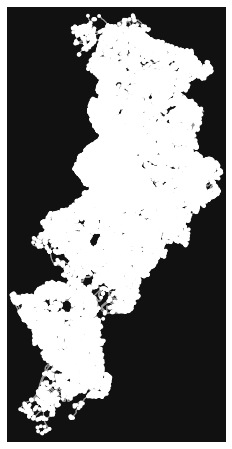

In [186]:
fig, ax = ox.plot_graph(graph)

In [187]:
area = ox.geocode_to_gdf(place_name) # returns a GeoDataFrame based on the specified place name query

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [188]:
type(area)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


geopandas.geodataframe.GeoDataFrame

In [189]:
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-2.31992 53.41161, -2.31847 53.40999...",53.544592,53.340104,-2.146829,-2.319918,296968384,relation,146656,53.479489,-2.245115,"Manchester, Greater Manchester, England, Unite...",boundary,administrative,0.791719


C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

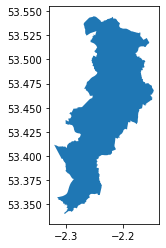

In [190]:
area.plot()

1-PUB

In [192]:
pub = ox.geometries_from_place(place_name, tags={"amenity": "pub"})

In [193]:
len(pub)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


256

In [194]:
# Available columns
pub.columns

Index(['amenity', 'name', 'real_ale', 'geometry', 'created_by', 'addr:city',
       'addr:country', 'addr:housenumber', 'addr:postcode', 'addr:street',
       ...
       'HE_ref', 'eh:inscription_date', 'heritage', 'heritage:operator',
       'historic', 'wikidata', 'source:addr:housenumber',
       'source:addr:postcode', 'landuse', 'disused'],
      dtype='object', length=102)

In [195]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
z1=pub[cols]

In [196]:
z1.to_csv('z1pub.csv')

z1

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                            
node         25585050      Famous Trevor Arms           NaN   
             26520283            The Wendover           NaN   
             27024301               Bellhouse           NaN   
             27024692            The Didsbury       M20 2SG   
             27024693        Ye Olde Cock Inn       M20 2RN   
...                                       ...           ...   
way          840279489          The Happy Man           NaN   
             985852043              The Grove           NaN   
             990576933            The Railway           NaN   
             1007810375          Bradford Inn           NaN   
             1046230724  Sir Ralph Abercromby        M2 5GU   

                                                                  geometry  \
element_type osmid                                                           
node         25585050                            POINT (-2.28174 53.43867)   
             26520283                            POINT (-2.30457 53.40413)   
             27024301                            POINT (-2.21848 53.41080)   
             27024692                            POINT (-2.23091 53.41027)   
             27024693                            POINT (-2.23106 53.41062)   
...                                                                    ...   
way          840279489   POLYGON ((-2.27555 53.38051, -2.27580 53.38035...   
             985852043   POLYGON ((-2.15346 53.47292, -2.15328 53.47291...   
             990576933   POLYGON ((-2.15042 53.47216, -2.15051 53.47215...   
             1007810375  POLYGON ((-2.20974 53.48733, -2.20965 53.48727...   
             1046230724  POLYGON ((-2.24787 53.47850, -2.24784 53.47858...   

                        amenity      addr:street   addr:city  
element_type osmid                                            
node         25585050       pub              NaN         NaN  
             26520283       pub              NaN         NaN  
             27024301       pub              NaN         NaN  
             27024692       pub    Wilmslow Road  Manchester  
             27024693       pub    Wilmslow Road  Manchester  
...                         ...              ...         ...  
way          840279489      pub              NaN         NaN  
             985852043      pub  Ashton Old Road         NaN  
             990576933      pub              NaN         NaN  
             1007810375     pub    Bradford Road  Manchester  
             1046230724     pub    Bootle Street  Manchester  

[256 rows x 6 columns]

2-RESTAURANTS

In [198]:
# Retrieve restaurants
restaurants = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "restaurant"}
                                 )

In [199]:
# How many restaurants do we have?
len(restaurants)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


462

In [200]:
# Available columns
restaurants.columns

Index(['addr:city', 'addr:country', 'addr:housenumber', 'addr:place',
       'addr:postcode', 'addr:street', 'amenity', 'contact:website', 'cuisine',
       'drive_in',
       ...
       'diet:halal', 'nodes', 'building', 'building:levels',
       'addr:interpolation', 'building:part', 'fixme', 'note:en',
       'opening_hours:signed', 'building:use'],
      dtype='object', length=107)

In [201]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
z2=restaurants[cols]

In [202]:
z2
z2.to_csv('z2restaurants.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3-CAFES

In [204]:
# Retrieve cafes
cafe = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "cafe"}
                                 )

In [205]:
# How many cafes do we have?
len(cafe)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


255

In [206]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
z3=cafe[cols]


In [207]:
z3

z3.to_csv('z3cafe.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4-TOWNHALL

In [208]:
townhall = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "townhall"}
                                 )

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [209]:
len(townhall)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2

In [210]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']

In [211]:
# Print only selected cols
z4=townhall[cols]

In [213]:
z4 

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,name,addr:postcode,geometry,amenity,addr:street,addr:city
element_type,osmid,,,,,,
node,1295894914,Manchester City Council Service Centre,NaN,POINT (-2.24427 53.47856),townhall,NaN,NaN
relation,5409378,Manchester Town Hall,M2 5DB,"POLYGON ((-2.24426 53.47965, -2.24422 53.47962...",townhall,Albert Square,Manchester


In [212]:
z4.to_csv('z4townhall.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5-POST_OFFICE

In [214]:
post_office = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "post_office"}
                                 )


C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [215]:
len(post_office)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


45

In [216]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
z5=post_office[cols]

In [218]:
z5.to_csv('z5post_office.csv')
z5

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                         
node         292150995                                 NaN           NaN   
             303805399            Newton Heath Post Office       M40 2FF   
             307495792          Stockport Road Post Office           NaN   
             307748116                                 NaN           NaN   
             313293181            Lapwing Lane Post Office           NaN   
             366037198            Barnes Green Post Office        M9 4DL   
             369463490                Hightown Post Office           NaN   
             378189863             Meldon Road Post Office       M13 0TZ   
             760486096                Chorlton Post Office           NaN   
             908720540             Bowker Vale Post Office           NaN   
             1108010737          Wilmslow Park Post Office       M13 0JQ   
             1131253324               Openshaw Post Office           NaN   
             1659355705        Lightbowne Road Post Office       M40 5EE   
             1676892961           Burnage Lane Post Office       M19 2WN   
             1780438849        Crumpsall Green Post Office        M8 5SF   
             1780444488         Middleton Road Post Office        M8 4JY   
             2143943773           Nisa Local & Post Office           NaN   
             2299500690              Hart Road Post Office       M14 7LE   
             2887957504                 Gorton Post Office       M18 8TX   
             2934097350           Briscoe Lane Post Office       M40 2TL   
             3316939059      South Levenshulme Post Office       M19 2SU   
             3588636075        Victoria Avenue Post Office        M9 6RA   
             3639549474             White Moss Post Office        M9 7BD   
             3660605500                                NaN           NaN   
             3675020429                        Cnuk Parcel           NaN   
             3741972789       Piccadilly Plaza Post Office           NaN   
             4346117989             Northenden Post Office       M22 4FZ   
             4457600851                    Mail Boxes Etc.        M3 4EW   
             4621464389              Peel Hall Post Office       M22 5DW   
             5611175414     Egerton Road South Post Office           NaN   
             5816682575                    Mail Boxes Etc.        M1 1AN   
             5825103974                  Hulme Post Office       M15 5TL   
             6419002113                       City Address        M4 6DE   
             6535193714                                NaN        M1 4AL   
             9131640705   Great Ancoats Street Post Office        M4 5AB   
             9254794260          Ladybarn Lane Post Office       M14 6YH   
             9600957108             Manchester Post Office        M2 1BB   
             9606529727          Mosley Street Post Office        M2 3AG   
             9609050801  Deansgate Post Office & Souvenirs        M3 2BQ   
             9656666449                     Mail Boxes Etc       M14 5TP   
             9833951590            Oxford Road Post Office        M1 5QA   
             9930103835                           Parcel24        M8 8AF   
way          497150729              Hardy Lane Post Office       M21 7QH   
             607173490                Post Office Sharston           NaN   
             766106286         Ashton New Road Post Office        M4 7HR   

                                                                  geometry  \
element_type osmid                                                           
node         292150995                           POINT (-2.22800 53.53289)   
             303805399                           POINT (-2.18849 53.50221)   
             307495792                           POINT (-2.21847 53.46723)   
             307748116                           POINT (-2.21068 53.42707)   
             

6-MARKETPLACE

In [219]:
marketplace = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "marketplace"}
                                 )


C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [220]:
len(marketplace)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


11

In [221]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
z6=marketplace[cols]


In [222]:
z6.to_csv('z6marketplace.csv')
z6

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                          
node         298658974                     Longsight Market           NaN   
             431208270                  Newton Heath Market           NaN   
             2238092180                       Gorton Market           NaN   
             3590482371                      Arndale Market           NaN   
             6202369887                 Hulme Indoor Market       M15 5JT   
way          130421037   Manchester Craft and Design Centre        M4 5JD   
             198741713                         Mackie Mayor           NaN   
             219091487                     Harpurhey Market           NaN   
             353267811                 Church Street Market           NaN   
             662519909                         Hulme Market           NaN   
             981942941                   Levenshulme Market       M19 3BS   

                                                                  geometry  \
element_type osmid                                                           
node         298658974                           POINT (-2.20132 53.45638)   
             431208270                           POINT (-2.18293 53.50149)   
             2238092180                          POINT (-2.17225 53.46242)   
             3590482371                          POINT (-2.23946 53.48324)   
             6202369887                          POINT (-2.24786 53.46144)   
way          130421037   POLYGON ((-2.23590 53.48445, -2.23547 53.48421...   
             198741713   POLYGON ((-2.23491 53.48565, -2.23454 53.48546...   
             219091487   POLYGON ((-2.21172 53.51167, -2.21095 53.51150...   
             353267811   POLYGON ((-2.23892 53.48303, -2.23888 53.48312...   
             662519909   POLYGON ((-2.24818 53.46181, -2.24760 53.46180...   
             981942941   POLYGON ((-2.19249 53.44461, -2.19243 53.44445...   

                             amenity        addr:street   addr:city  
element_type osmid                                                   
node         298658974   marketplace                NaN         NaN  
             431208270   marketplace                NaN         NaN  
             2238092180  marketplace                NaN         NaN  
             3590482371  marketplace                NaN         NaN  
             6202369887  marketplace  Hulme High Street  Manchester  
way          130421037   marketplace         Oak Street         NaN  
             198741713   marketplace                NaN         NaN  
             219091487   marketplace                NaN         NaN  
             353267811   marketplace                NaN         NaN  
             662519909   marketplace                NaN         NaN  
             981942941   marketplace     Stockport Road  Manchester

7-NIGHTCLUB

In [223]:
nightclub = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "nightclub"}
                                 )

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [224]:
len(nightclub)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


14

In [227]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
z7=nightclub[cols]

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [228]:
z7.to_csv('z7nightclub.csv')
z7

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                      
node         287031482   The Amber Club           NaN   
             307987237        Napoleons           NaN   
             334648541      42nd Street        M2 5GU   
             357160362         Wave Bar        M4 1SH   
             357207264            TV 21           NaN   
             1295097473  Club Tropicana        M1 3LZ   
             4295880405          Sixxis        M1 5WQ   
             5832926287        Cruz 101        M1 3LY   
             6028250743    Night People        M1 6DD   
             6223644271             NaN           NaN   
             6534352365   Platinum Baby        M1 6JB   
             9062401417             YES        M1 7DB   
             9101678262  Satan's Hollow           NaN   
             9811101341       LA Lounge        M1 7HL   

                                          geometry    amenity  \
element_type osmid                                              
node         287031482   POINT (-2.18003 53.50327)  nightclub   
             307987237   POINT (-2.23767 53.47720)  nightclub   
             334648541   POINT (-2.24916 53.47855)  nightclub   
             357160362   POINT (-2.23671 53.48194)  nightclub   
             357207264   POINT (-2.23779 53.48458)  nightclub   
             1295097473  POINT (-2.23705 53.47703)  nightclub   
             4295880405  POINT (-2.24478 53.47386)  nightclub   
             5832926287  POINT (-2.23932 53.47720)  nightclub   
             6028250743  POINT (-2.23903 53.47666)  nightclub   
             6223644271  POINT (-2.24745 53.41590)  nightclub   
             6534352365  POINT (-2.23869 53.47643)  nightclub   
             9062401417  POINT (-2.23816 53.47401)  nightclub   
             9101678262  POINT (-2.23942 53.47737)  nightclub   
             9811101341  POINT (-2.23467 53.47109)  nightclub   

                                   addr:street   addr:city  
element_type osmid                                          
node         287031482                     NaN         NaN  
             307987237            Bloom Street  Manchester  
             334648541           Bootle Street  Manchester  
             357160362              Tib Street  Manchester  
             357207264                     NaN         NaN  
             1295097473       Sackville Street  Manchester  
             4295880405  Whitworth Street West  Manchester  
             5832926287           Major Street  Manchester  
             6028250743        Princess Street  Manchester  
             6223644271                    NaN         NaN  
             6534352365        Princess Street  Manchester  
             9062401417         Charles Street  Manchester  
             9101678262                    NaN         NaN  
             9811101341       Grosvenor Street  Manchester

8-CINEMA

In [229]:
cinema = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "cinema"}
                                 )

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [230]:
len(cinema)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6

In [233]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
z8=cinema[cols]

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [234]:
z8.to_csv('z8cinema.csv')

z8

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                      
node         307874659                            Odeon           NaN   
             1510001469                             Vue        M4 2BS   
             3693252208                   Home - Cinema       M15 4FN   
             6945355394  Everyman Manchester St. John's        M3 4AS   
way          237785643                        Cineworld       M20 5PG   
             273030492                 Showcase Cinemas           NaN   

                                                                  geometry  \
element_type osmid                                                           
node         307874659                           POINT (-2.24966 53.47641)   
             1510001469                          POINT (-2.24037 53.48526)   
             3693252208                          POINT (-2.24662 53.47361)   
             6945355394                          POINT (-2.25290 53.47837)   
way          237785643   POLYGON ((-2.21911 53.41001, -2.21908 53.41000...   
             273030492   POLYGON ((-2.18888 53.46320, -2.18824 53.46338...   

                        amenity           addr:street   addr:city  
element_type osmid                                                 
node         307874659   cinema                   NaN         NaN  
             1510001469  cinema           Withy Grove  Manchester  
             3693252208  cinema     Tony Wilson Place  Manchester  
             6945355394  cinema           Quay Street  Manchester  
way          237785643   cinema  Entertainment Centre  Manchester  
             273030492   cinema                   NaN         NaN

9-social_facility

In [236]:
social_facility = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "social_facility"}
                                 )

In [237]:
len(social_facility)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


29

In [238]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
z9=social_facility[cols]

In [239]:
z9.to_csv('z9social_facility.csv')
z9

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name  \
element_type osmid                                                           
node         2842345837                                                NaN   
             4948655591  Cosgrove Hall Court - Retirement Living - McCa...   
way          236465184                                          Dom Polski   
             236465263                                Abbotsford Care Home   
             438383349                              Gorton Parks Care Home   
             462607474                                       Carlton House   
             463620322                       Indian Senior Citizens Centre   
             464989410                            Dunedin Residential Home   
             465612776                                     Fairleigh House   
             465698234                            Polonia Residential Home   
             467538522                               Crossacres Day Centre   
             470053672                                        Alness Lodge   
             473400266                                       Mariana House   
             473609168                                       Russley Lodge   
             473609173                                                 NaN   
             473609174                                      Chorlton Place   
             473629660                         Alexandra Lodge Care Centre   
             473640874                                        Contact-Home   
             475000372                                     Wellfield House   
             477958905                                      Sycamore Court   
             479170646                                                 NaN   
             479170909                       Care Today Childrens Services   
             602209447                                   Gorton Day Centre   
             650077266                                                 NaN   
             664431105                              Northenden Social Club   
             784600335                                       Elmswood Park   
             868349221                                    Cheshire Gardens   
             913860613                                         Mayes Court   
             913860614                                                 NaN   

                        addr:postcode  \
element_type osmid                      
node         2842345837           NaN   
             4948655591       M21 0BA   
way          236465184        M16 8BB   
             236465263        M16 8BB   
             438383349        M18 8DF   
             462607474        M16 8BE   
             463620322        M16 8AB   
             464989410        M16 8ET   
             465612776        M16 8EX   
             465698234        M16 8HG   
             467538522        M22 5DG   
             470053672        M16 8HW   
             473400266        M16 8GH   
             473609168        M16 8WP   
             473609173        M16 8LT   
             473609174        M16 8LT   
             473629660        M16 8NP   
             473640874        M16 8GL   
             475000372        M16 8QN   
             477958905            NaN   
             479170646        M19 3LZ   
             479170909        M19 3HP   
             602209447        M18 7QF   
             650077266            NaN   
             664431105            NaN   
             784600335        M14 4UZ   
             868349221        M14 7DD   
             913860613            NaN   
             913860614            NaN   

                                                                  geometry  \
element_type osmid                                                           
node         2842345837                          POINT (-2.23153 53.46470)   
             4948655591                          POINT (-2.27658 53.44549)   
way          236465184   POLYGON ((-2.26086 53.45418, -2.26070 53.4

10-bicycle_rental

In [241]:
bicycle_rental = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "bicycle_rental"}
                                 )

In [242]:
len(bicycle_rental)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


17

In [245]:
bicycle_rental.columns

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['amenity', 'capacity', 'fee', 'operator', 'ref', 'website', 'geometry',
       'network', 'capacity:cargo_bike', 'operator:type', 'payment:app',
       'rental'],
      dtype='object')

11-BANK

In [246]:
bank = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "bank"}
                                 )

In [247]:
len(bank)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


43

In [250]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']
        
# Print only selected cols
z11=bank[cols]

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [251]:
z11.to_csv('z11bank.csv')


z11

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name  \
element_type osmid                                                 
node         255489043                                  Barclays   
             255677144                                 Santander   
             307753168                                      HSBC   
             331409737                                 Santander   
             331411190                     The Co-operative Bank   
             909275778                                       RBS   
             909300416                                   NatWest   
             1492352450                                Santander   
             1520847850                                      BOC   
             1524469116                                 Barclays   
             1534678545  Barclays (closed down at this location)   
             1739157994                                  NatWest   
             1739158184                                 Barclays   
             1826031430                                  HSBC UK   
             2636970937                                  NatWest   
             2674600169                                     HSBC   
             2684183689                                  Halifax   
             2684183695                   Leeds Building Society   
             2684183696                               Nationwide   
             2814731802                                  NatWest   
             3691433534                                 Barclays   
             3890204832                                      RBS   
             4301895285                                Santander   
             4719945708                                 Barclays   
             5159617444                                  HSBC UK   
             5257849871                              Lloyds Bank   
             5472996639                                      RBS   
             5628825263                               Nationwide   
             6358514132                            Bank of India   
             6404929564                                  Halifax   
             6451993796            South Manchester Credit Union   
             6535193733                  BEA - Bank of East Asia   
             6955689879                 St James Safe Deposit Co   
             8600480245                                  NatWest   
             9600957102                             Virgin Money   
             9600975159                               Metro Bank   
             9600975164                                      TSB   
             9606529742                 Skipton Building Society   
             9637725091                               ICICI Bank   
             9654199962                              Lloyds Bank   
             9932732106                            Handelsbanken   
way          31892435                       United National Bank   
             478798250                                       TSB   

                        addr:postcode  \
element_type osmid                      
node         255489043            NaN   
             255677144            NaN   
             307753168            NaN   
             331409737         M2 7AQ   
             331411190         M2 4JG   
             909275778            NaN   
             909300416            NaN   
             1492352450           NaN   
             1520847850        M2 3JB   
             1524469116        M2 3HQ   
             1534678545           NaN   
             1739157994           NaN   
             1739158184           NaN   
             1826031430        M2 7HD   
             2636970937        M1 4QT   
             2674600169           NaN   
             2684183689        M2 1HX   
             2684183695        M2 4JF   
             2684183696           NaN   
             2814731802           NaN   
             3691433534        M1 1PD   
             3890204832           NaN   
             43

12-arts_centre

In [252]:
arts_centre = ox.geometries_from_place(place_name, 
                                  tags={"amenity": "arts_centre"}
                                 )

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [253]:
len(arts_centre)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6

In [254]:
# Select some useful cols and print
cols = ['name','addr:postcode','geometry','amenity','addr:street','addr:city']

In [255]:
# Print only selected cols
z12=arts_centre[cols]

In [256]:
z12.to_csv('z12arts_centre.csv')


z12

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                   
node         357207748           Chinese Arts Centre           NaN   
             2626249338             Band on the Wall           NaN   
             7997455502                 The Horsfall           NaN   
             9877666183  Zain Hub Creative Workspace        M8 8EL   
way          94975142        Levenshulme Old Library       M19 3QE   
             373603702                    The Miners           NaN   

                                                                  geometry  \
element_type osmid                                                           
node         357207748                           POINT (-2.23750 53.48471)   
             2626249338                          POINT (-2.23416 53.48522)   
             7997455502                          POINT (-2.22949 53.48318)   
             9877666183                          POINT (-2.24869 53.49284)   
way          94975142    POLYGON ((-2.18633 53.44519, -2.18628 53.44503...   
             373603702   POLYGON ((-2.17826 53.51560, -2.17854 53.51531...   

                             amenity     addr:street   addr:city  
element_type osmid                                                
node         357207748   arts_centre             NaN         NaN  
             2626249338  arts_centre             NaN         NaN  
             7997455502  arts_centre             NaN         NaN  
             9877666183  arts_centre   Bury New Road  Manchester  
way          94975142    arts_centre  Cromwell Grove  Manchester  
             373603702   arts_centre             NaN         NaN

In [257]:
newdf2=z1
newdf2=newdf2.append(z2)
newdf2=newdf2.append(z3)
newdf2=newdf2.append(z4)
newdf2=newdf2.append(z5)
newdf2=newdf2.append(z6)
newdf2=newdf2.append(z7)
newdf2=newdf2.append(z8)
newdf2=newdf2.append(z9)
newdf2=newdf2.append(z11)
newdf2=newdf2.append(z12)
newdf2

newdf2.to_csv('osmdata2.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-257-6f20fe5903ed>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf2=newdf2.append(z2)
<ipython-input-257-6f20fe5903ed>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf2=newdf2.append(z3)
<ipython-input-257-6f20fe5903ed>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf2=newdf2.append(z4)
<ipython-input-257-6f20fe5903ed>:5: FutureWarning: The

In [258]:
newdf2

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name addr:postcode  \
element_type osmid                                                   
node         25585050             Famous Trevor Arms           NaN   
             26520283                   The Wendover           NaN   
             27024301                      Bellhouse           NaN   
             27024692                   The Didsbury       M20 2SG   
             27024693               Ye Olde Cock Inn       M20 2RN   
...                                              ...           ...   
             2626249338             Band on the Wall           NaN   
             7997455502                 The Horsfall           NaN   
             9877666183  Zain Hub Creative Workspace        M8 8EL   
way          94975142        Levenshulme Old Library       M19 3QE   
             373603702                    The Miners           NaN   

                                                                  geometry  \
element_type osmid                                                           
node         25585050                            POINT (-2.28174 53.43867)   
             26520283                            POINT (-2.30457 53.40413)   
             27024301                            POINT (-2.21848 53.41080)   
             27024692                            POINT (-2.23091 53.41027)   
             27024693                            POINT (-2.23106 53.41062)   
...                                                                    ...   
             2626249338                          POINT (-2.23416 53.48522)   
             7997455502                          POINT (-2.22949 53.48318)   
             9877666183                          POINT (-2.24869 53.49284)   
way          94975142    POLYGON ((-2.18633 53.44519, -2.18628 53.44503...   
             373603702   POLYGON ((-2.17826 53.51560, -2.17854 53.51531...   

                             amenity     addr:street   addr:city  
element_type osmid                                                
node         25585050            pub             NaN         NaN  
             26520283            pub             NaN         NaN  
             27024301            pub             NaN         NaN  
             27024692            pub   Wilmslow Road  Manchester  
             27024693            pub   Wilmslow Road  Manchester  
...                              ...             ...         ...  
             2626249338  arts_centre             NaN         NaN  
             7997455502  arts_centre             NaN         NaN  
             9877666183  arts_centre   Bury New Road  Manchester  
way          94975142    arts_centre  Cromwell Grove  Manchester  
             373603702   arts_centre             NaN         NaN  

[1129 rows x 6 columns]

In [259]:
import pandas as pd
import glob
import os

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [289]:

# set files path
osmdata = "C:\\Users\\busra\\Ahoy\\Jordan\\datasets\\osmdata.csv"
osmdata1 = "C:\\Users\\busra\\Ahoy\\Jordan\\datasets\\osmdata1.csv"
osmdata2 = "C:\\Users\\busra\\Ahoy\\Jordan\\datasets\\osmdata2.csv"

print("*** Merging multiple csv files into a single pandas dataframe ***")

# merge files
osmdatamerged = pd.concat(
   map(pd.read_csv, [osmdata, osmdata1,osmdata2]), ignore_index=True)
print(osmdatamerged)

*** Merging multiple csv files into a single pandas dataframe ***
      element_type       osmid                         name addr:postcode  \
0             node      451152              King of Prussia        N3 1DH   
1             node      451154       The Catcher in the Rye           NaN   
2             node      451271                 The Tally Ho           NaN   
3             node    12242503                 Railway Bell           NaN   
4             node    12243302                   The George       E11 2RL   
...            ...         ...                          ...           ...   
22161         node  2626249338             Band on the Wall           NaN   
22162         node  7997455502                 The Horsfall           NaN   
22163         node  9877666183  Zain Hub Creative Workspace        M8 8EL   
22164          way    94975142      Levenshulme Old Library       M19 3QE   
22165          way   373603702                   The Miners           NaN   

         

In [271]:
osmdatamerged.to_csv('osmdatamerged.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [287]:
osmdatamerged

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,element_type,osmid,name,addr:postcode,geometry,amenity,addr:street,addr:city
0,node,451152,King of Prussia,N3 1DH,POINT (-0.1946078 51.6008404),pub,Regents Park Road,London
1,node,451154,The Catcher in the Rye,NaN,POINT (-0.196028 51.5995788),pub,Regents Park Road,NaN
2,node,451271,The Tally Ho,NaN,POINT (-0.1765556 51.6141038),pub,High Road,London
3,node,12242503,Railway Bell,NaN,POINT (0.0279621 51.5920158),pub,NaN,NaN
4,node,12243302,The George,E11 2RL,POINT (0.0282186 51.5759872),pub,High Street,London
...,...,...,...,...,...,...,...,...
22161,node,2626249338,Band on the Wall,NaN,POINT (-2.2341622 53.4852205),arts_centre,NaN,NaN
22162,node,7997455502,The Horsfall,NaN,POINT (-2.2294878 53.4831752),arts_centre,NaN,NaN
22163,node,9877666183,Zain Hub Creative Workspace,M8 8EL,POINT (-2.2486944 53.4928389),arts_centre,Bury New Road,Manchester
22164,way,94975142,Levenshulme Old Library,M19 3QE,"POLYGON ((-2.1863297 53.4451913, -2.1862792 53...",arts_centre,Cromwell Grove,Manchester


In [300]:
osmdatamerged[['useless','long','Lat']]=osmdatamerged['geometry'].str.split(' ',n=2, expand=True)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [299]:
osmdatamerged

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,element_type,osmid,name,addr:postcode,geometry,amenity,addr:street,addr:city,useless,long,Lat
0,node,451152,King of Prussia,N3 1DH,POINT (-0.1946078 51.6008404),pub,Regents Park Road,London,POINT,(-0.1946078,51.6008404)
1,node,451154,The Catcher in the Rye,NaN,POINT (-0.196028 51.5995788),pub,Regents Park Road,NaN,POINT,(-0.196028,51.5995788)
2,node,451271,The Tally Ho,NaN,POINT (-0.1765556 51.6141038),pub,High Road,London,POINT,(-0.1765556,51.6141038)
3,node,12242503,Railway Bell,NaN,POINT (0.0279621 51.5920158),pub,NaN,NaN,POINT,(0.0279621,51.5920158)
4,node,12243302,The George,E11 2RL,POINT (0.0282186 51.5759872),pub,High Street,London,POINT,(0.0282186,51.5759872)
...,...,...,...,...,...,...,...,...,...,...,...
22161,node,2626249338,Band on the Wall,NaN,POINT (-2.2341622 53.4852205),arts_centre,NaN,NaN,POINT,(-2.2341622,53.4852205)
22162,node,7997455502,The Horsfall,NaN,POINT (-2.2294878 53.4831752),arts_centre,NaN,NaN,POINT,(-2.2294878,53.4831752)
22163,node,9877666183,Zain Hub Creative Workspace,M8 8EL,POINT (-2.2486944 53.4928389),arts_centre,Bury New Road,Manchester,POINT,(-2.2486944,53.4928389)
22164,way,94975142,Levenshulme Old Library,M19 3QE,"POLYGON ((-2.1863297 53.4451913, -2.1862792 53...",arts_centre,Cromwell Grove,Manchester,POLYGON,((-2.1863297,"53.4451913, -2.1862792 53.4450284, -2.1858969 ..."


In [314]:
osmdatamerged['long'] = osmdatamerged['long'].str.replace(r"(","")

osmdatamerged['Lat'] = osmdatamerged['Lat'].str.replace(r")","")

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-314-771d4d286fd2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  osmdatamerged['long'] = osmdatamerged['long'].str.replace(r"(","")
<ipython-input-314-771d4d286fd2>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  osmdatamerged['Lat'] = osmdatamerged['Lat'].str.replace(r")","")


In [315]:
osmdatamerged

,element_type,osmid,name,addr:postcode,geometry,amenity,addr:street,addr:city,useless,long,Lat
0,node,451152,King of Prussia,N3 1DH,POINT (-0.1946078 51.6008404),pub,Regents Park Road,London,POINT,-0.1946078,51.6008404
1,node,451154,The Catcher in the Rye,NaN,POINT (-0.196028 51.5995788),pub,Regents Park Road,NaN,POINT,-0.196028,51.5995788
2,node,451271,The Tally Ho,NaN,POINT (-0.1765556 51.6141038),pub,High Road,London,POINT,-0.1765556,51.6141038
3,node,12242503,Railway Bell,NaN,POINT (0.0279621 51.5920158),pub,NaN,NaN,POINT,0.0279621,51.5920158
4,node,12243302,The George,E11 2RL,POINT (0.0282186 51.5759872),pub,High Street,London,POINT,0.0282186,51.5759872
...,...,...,...,...,...,...,...,...,...,...,...
22161,node,2626249338,Band on the Wall,NaN,POINT (-2.2341622 53.4852205),arts_centre,NaN,NaN,POINT,-2.2341622,53.4852205
22162,node,7997455502,The Horsfall,NaN,POINT (-2.2294878 53.4831752),arts_centre,NaN,NaN,POINT,-2.2294878,53.4831752
22163,node,9877666183,Zain Hub Creative Workspace,M8 8EL,POINT (-2.2486944 53.4928389),arts_centre,Bury New Road,Manchester,POINT,-2.2486944,53.4928389
22164,way,94975142,Levenshulme Old Library,M19 3QE,"POLYGON ((-2.1863297 53.4451913, -2.1862792 53...",arts_centre,Cromwell Grove,Manchester,POLYGON,-2.1863297,"53.4451913, -2.1862792 53.4450284, -2.1858969 ..."


In [330]:
osmdatamerged[['Lat','useless1']]=osmdatamerged['Lat'].str.split(',',n=1, expand=True)

In [331]:
osmdatamerged

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,element_type,osmid,name,addr:postcode,geometry,amenity,addr:street,addr:city,useless,long,Lat,useless1
0,node,451152,King of Prussia,N3 1DH,POINT (-0.1946078 51.6008404),pub,Regents Park Road,London,POINT,-0.1946078,51.6008404,None
1,node,451154,The Catcher in the Rye,NaN,POINT (-0.196028 51.5995788),pub,Regents Park Road,NaN,POINT,-0.196028,51.5995788,None
2,node,451271,The Tally Ho,NaN,POINT (-0.1765556 51.6141038),pub,High Road,London,POINT,-0.1765556,51.6141038,None
3,node,12242503,Railway Bell,NaN,POINT (0.0279621 51.5920158),pub,NaN,NaN,POINT,0.0279621,51.5920158,None
4,node,12243302,The George,E11 2RL,POINT (0.0282186 51.5759872),pub,High Street,London,POINT,0.0282186,51.5759872,None
...,...,...,...,...,...,...,...,...,...,...,...,...
22161,node,2626249338,Band on the Wall,NaN,POINT (-2.2341622 53.4852205),arts_centre,NaN,NaN,POINT,-2.2341622,53.4852205,None
22162,node,7997455502,The Horsfall,NaN,POINT (-2.2294878 53.4831752),arts_centre,NaN,NaN,POINT,-2.2294878,53.4831752,None
22163,node,9877666183,Zain Hub Creative Workspace,M8 8EL,POINT (-2.2486944 53.4928389),arts_centre,Bury New Road,Manchester,POINT,-2.2486944,53.4928389,None
22164,way,94975142,Levenshulme Old Library,M19 3QE,"POLYGON ((-2.1863297 53.4451913, -2.1862792 53...",arts_centre,Cromwell Grove,Manchester,POLYGON,-2.1863297,53.4451913,"-2.1862792 53.4450284, -2.1858969 53.4450775,..."


In [335]:
osmdatamerged = osmdatamerged.drop('useless1', axis=1)

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [336]:
osmdatamerged

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,element_type,osmid,name,addr:postcode,geometry,amenity,addr:street,addr:city,long,Lat
0,node,451152,King of Prussia,N3 1DH,POINT (-0.1946078 51.6008404),pub,Regents Park Road,London,-0.1946078,51.6008404
1,node,451154,The Catcher in the Rye,NaN,POINT (-0.196028 51.5995788),pub,Regents Park Road,NaN,-0.196028,51.5995788
2,node,451271,The Tally Ho,NaN,POINT (-0.1765556 51.6141038),pub,High Road,London,-0.1765556,51.6141038
3,node,12242503,Railway Bell,NaN,POINT (0.0279621 51.5920158),pub,NaN,NaN,0.0279621,51.5920158
4,node,12243302,The George,E11 2RL,POINT (0.0282186 51.5759872),pub,High Street,London,0.0282186,51.5759872
...,...,...,...,...,...,...,...,...,...,...
22161,node,2626249338,Band on the Wall,NaN,POINT (-2.2341622 53.4852205),arts_centre,NaN,NaN,-2.2341622,53.4852205
22162,node,7997455502,The Horsfall,NaN,POINT (-2.2294878 53.4831752),arts_centre,NaN,NaN,-2.2294878,53.4831752
22163,node,9877666183,Zain Hub Creative Workspace,M8 8EL,POINT (-2.2486944 53.4928389),arts_centre,Bury New Road,Manchester,-2.2486944,53.4928389
22164,way,94975142,Levenshulme Old Library,M19 3QE,"POLYGON ((-2.1863297 53.4451913, -2.1862792 53...",arts_centre,Cromwell Grove,Manchester,-2.1863297,53.4451913


In [337]:
osmdatamerged.to_csv('osmdatamerged1.csv')

C:\Users\busra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
dataset1 = pd.read_csv("C:/Users/busra/Ahoy/Jordan/Deneme123.csv")
dataset1.head(10)

,Tweet Id,Date,Hour,User Name,Nickname,Bio,Tweet content,Favs,RTs,Latitude,...,Following,Listed,Tweet language (ISO 639-1),Tweet Url,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,723066388391157762,2016-04-21,08:30,ZPR,ZPRSoho,22 straight talking PRs based in Soho sharing ...,Talking to some great journos this morning all...,NaN,NaN,51.505185,...,710.0,44.0,en,http://www.twitter.com/ZPRSoho/status/72306638...,NaN,NaN,NaN,NaN,NaN,NaN
1,723066384297672704,2016-04-21,08:30,Beep!Beep!,BeepBeepTraffic,UK Traffic Alert App for iOS http://t.co/55H1q...,Incident (Severe delay) M6 northbound between ...,NaN,NaN,52.615627,...,245.0,78.0,en,http://www.twitter.com/BeepBeepTraffic/status/...,NaN,NaN,NaN,NaN,NaN,NaN
2,723066381751689216,2016-04-21,08:30,Annette,annetteand2dogs,"Sociologist, (vintage) cyclist, dog lover, mus...",THIS: “@Colmogorman: Great piece by @amcteirna...,NaN,NaN,53.336995,...,456.0,20.0,en,http://www.twitter.com/annetteand2dogs/status/...,NaN,NaN,NaN,NaN,NaN,NaN
3,723066348201353216,2016-04-21,08:30,Dollie Henry,DollieHenry,Choreographer | Theatre Director | Educator | ...,A Little snippet from my #SundayJazzCongregati...,NaN,NaN,51.513451,...,1685.0,20.0,en,http://www.twitter.com/DollieHenry/status/7230...,NaN,NaN,NaN,NaN,NaN,NaN
4,723066335803019264,2016-04-21,08:30,Quintiles Careers,QuintilesCareer,Want to Connect to Great Opportunity? Now is a...,If you're a #Pharmaceutical professional in #M...,NaN,NaN,53.480759,...,19.0,557.0,en,http://www.twitter.com/QuintilesCareer/status/...,NaN,NaN,NaN,NaN,NaN,NaN
5,723066322528120832,2016-04-21,08:30,TubeMogul,TubeMogul,TubeMogul is a leading enterprise software com...,Our 2 day @Cadreon_IPG Summit kicks off in our...,NaN,NaN,51.515238,...,1861.0,740.0,en,http://www.twitter.com/TubeMogul/status/723066...,NaN,NaN,NaN,NaN,NaN,NaN
6,723066311291592704,2016-04-21,08:30,Sheila Murray-Forde,sheilanne88,"Yoga, Meditation, Ayurveda, Relaxation. Global...",Remembering Charlotte Bronte on the 200th anni...,NaN,NaN,53.832276,...,1227.0,12.0,en,http://www.twitter.com/sheilanne88/status/7230...,NaN,NaN,NaN,NaN,NaN,NaN
7,723066307793588224,2016-04-21,08:30,Pickwick Papers,PickwickFabrics,'Quirky Wallpaper & Fabric shop in Greenwich' ...,"""@christmas_cabin: @PickwickFabrics Hell Yeah!...",NaN,NaN,51.430730,...,1980.0,46.0,en,http://www.twitter.com/PickwickFabrics/status/...,NaN,NaN,NaN,NaN,NaN,NaN
8,723066306833055744,2016-04-21,08:30,Kilkenny Met,Kilkenny_Met,"A weather enthusiast, reporting live informati...","Wind 3.2 km/h ENE. Barometer 1023.30 mb, Risin...",NaN,NaN,52.733333,...,567.0,10.0,en,http://www.twitter.com/Kilkenny_Met/status/723...,NaN,NaN,NaN,NaN,NaN,NaN
9,723066305574780928,2016-04-21,08:30,Joe Rogers,realjoerogers,"Analog man in a digital world. Father, husband...",2 hours to kill (@ London @HeathrowAirport (LH...,NaN,NaN,51.469715,...,301.0,35.0,en,http://www.twitter.com/realjoerogers/status/72...,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df55 = pd.read_csv ('C:/Users/busra/Ahoy/Jordan/datasets/osmdatamerged1.csv')

In [5]:
df55.isnull().sum()

Unnamed: 0           0
element_type         0
osmid                0
name               496
addr:postcode    10667
geometry             0
amenity              0
addr:street       6725
addr:city        11131
long                 0
Lat                  0
dtype: int64

In [6]:
df56 = df55[df55['name'].notna()]

In [8]:
df56.isnull().sum()

Unnamed: 0           0
element_type         0
osmid                0
name                 0
addr:postcode    10228
geometry             0
amenity              0
addr:street       6326
addr:city        10686
long                 0
Lat                  0
dtype: int64

In [10]:
df56.to_csv('openstreetmapdataset.csv')